# 📦 Delivery Time Prediction & Optimization  

## 📝 Project Overview  
This project focuses on analyzing and optimizing delivery times using a real-world logistics dataset. We aim to:  
- *Identify key factors* influencing delivery efficiency.  
- *Build a predictive model* to estimate delivery times and flag potential delays.  
- *Provide actionable insights* to optimize last-mile logistics operations.  

## 🎯 Project Goals  
1. *Understand Delivery Efficiency* – Analyze factors affecting delivery speed and efficiency.  
2. *Predict Delivery Delays* – Use machine learning to estimate delivery times and flag delays.  
3. *Improve Customer Experience* – Evaluate how delivery performance impacts satisfaction.  
4. *Communicate Insights Effectively* – Present findings using visual reports and recommendations.  

## 🔍 Key Questions  
1. *What Are the Major Factors Affecting Delivery Time?*  
2. *Are There Patterns in Delivery Delays?*  
3. *Can We Predict Delivery Times Accurately?*  
4. *How Can We Optimize Delivery Operations?*  

## 🚀 Next Steps  
1. *Refine LightGBM Model* – Optimize hyperparameters for better accuracy.  
2. *Residual Analysis* – Investigate prediction errors using residual plots.  
3. *Feature Engineering* – Test interaction effects between key variables.  
4. *Stakeholder Communication* – Create visual reports & presentations.  

## 🔧 Skills Applied  
- *Data Cleaning & Preprocessing*  
- *Exploratory Data Analysis (EDA)*  
- *Machine Learning (Regression & Model Optimization)*  
- *Data Storytelling & Visualization*  

---

## Step 1: Imports

### Import packages

Import `numpy` and `pandas'.

In [41]:
import numpy as np
import pandas as pd

### Load the dataset

This Amazon Delivery Dataset provides a comprehensive view of the company's last-mile logistics operations. Use `pandas` to import the file `amazon_delivery.csv` as a DataFrame named `data`.

In [2]:
data = pd.read_csv("amazon_delivery.csv") #upload your dataset

## Step 2: Data exploration

In [21]:
data.head(10) # Preview first few rows

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [9]:
data.describe() # Summary statistics

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [11]:
data.describe(include="all") # Summary statistics include all

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739.000000,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,44,177,193,6,5,4,4,NaN,16
top,ialx566343618,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1141,460,481,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.905645,NaN
std,NaN,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.915451,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,NaN


In [13]:
data.info() # Check column types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns # for plotting charts

In [17]:
print(data.columns)

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')


In [19]:
print(data.isnull().sum())

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [23]:
data['Weather'].value_counts()

Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

In [25]:
data['Agent_Rating'].value_counts()

Agent_Rating
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

In [31]:
data['Agent_Age'].value_counts()

Agent_Age
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
29    2191
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: count, dtype: int64

In [33]:
for col in ['Traffic', 'Vehicle', 'Area']:
    print(f"Unique values in {col}:")
    print(data[col].value_counts())
    print("\n")

Unique values in Traffic:
Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64


Unique values in Vehicle:
Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64


Unique values in Area:
Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64




In [37]:
for col in ['Traffic', 'Vehicle', 'Area']:
    print(f"Unique values in {col}: {data[col].unique()}") ## checking for misspellings

Unique values in Traffic: ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Unique values in Vehicle: ['motorcycle ' 'scooter ' 'van' 'bicycle ']
Unique values in Area: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']


In [39]:
data[data['Agent_Age'] == 15] ## 15years is an obvious outlier

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
5659,pjec796867569,15,1.0,13.026286,80.275235,13.056286,80.305235,2022-03-11,NaN,20:50:00,NaN,NaN,bicycle,Metropolitian,125,Electronics
8783,ebhx017527500,15,1.0,12.970324,77.645748,13.080324,77.755748,2022-03-25,NaN,23:25:00,NaN,NaN,motorcycle,Metropolitian,170,Snacks
10466,loqy430001953,15,1.0,19.181300,72.836191,19.231300,72.886191,2022-03-30,NaN,20:55:00,NaN,NaN,motorcycle,Metropolitian,195,Clothing
10687,wxzn327559387,15,1.0,-21.183434,-72.814492,21.193434,72.824492,2022-03-05,NaN,11:30:00,NaN,NaN,scooter,Urban,135,Jewelry
11610,dlmc121704817,15,1.0,22.751857,75.866699,22.801857,75.916699,2022-03-24,NaN,21:15:00,NaN,NaN,bicycle,Metropolitian,140,Skincare
14530,vnkn657645307,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-16,NaN,23:55:00,NaN,NaN,bicycle,Metropolitian,105,Sports
15307,jbvk101196693,15,1.0,13.022394,80.242439,13.072394,80.292439,2022-03-11,NaN,18:10:00,NaN,NaN,bicycle,Metropolitian,85,Books


## Step 3. Data Cleaning

In [41]:
data = data[data['Agent_Age'] >= 18]  # Keep agents 18 and older

In [43]:
# Check for duplicate Order_IDs
duplicates = data['Order_ID'].duplicated().sum()

# Print the result
print(f"Number of duplicate Order_IDs: {duplicates}")

Number of duplicate Order_IDs: 0


### **Step 3. 1: Handle Missing Values**

#### **1. Weather and Agent_Rating**

- Fill missing `Weather` values with the mode since it’s a categorical variable.

- The mode for `Weather` is **Fog** And **Agent_Rating**

- Fill missing `Agent_Rating` values with the mean since it’s a numerical variable.

- The mean for `Agent_Rating` is approximately **4.63**.

### **2. Handle outliers in 'Agent_Rating'**

In [47]:
# Step 1: Handle missing values
# Fill missing 'Agent_Rating' with the mean
data.loc[:, 'Agent_Rating'] = data['Agent_Rating'].fillna(data['Agent_Rating'].mean())

# Fill missing 'Weather' with the mode
data.loc[:, 'Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])

# Step 2: Handle outliers in 'Agent_Rating'
# Cap ratings to the range [1.0, 5.0]
data.loc[:, 'Agent_Rating'] = data['Agent_Rating'].clip(lower=1.0, upper=5.0)

# Step 3: Verify the changes
print(data['Agent_Rating'].value_counts())
print(data['Weather'].value_counts())
print(data.isnull().sum())

Agent_Rating
4.800000    7148
4.700000    7142
4.900000    7041
4.600000    6940
5.000000    4049
4.500000    3303
4.100000    1430
4.200000    1418
4.300000    1409
4.400000    1361
4.000000    1077
3.500000     249
3.800000     228
3.700000     225
3.600000     207
3.900000     197
4.636944      54
3.400000      32
3.100000      29
3.200000      29
3.300000      25
2.600000      22
2.700000      22
2.500000      20
2.800000      19
2.900000      19
3.000000       6
Name: count, dtype: int64
Weather
Fog           7493
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [51]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2  # Import the required functions

# Step 1: Reload the dataset
data = pd.read_csv("cleaned_amazon_logistics1.csv")

# Step 2: Handle missing values
# Fill missing 'Agent_Rating' with the mean
data.loc[:, 'Agent_Rating'] = data['Agent_Rating'].fillna(data['Agent_Rating'].mean())

# Fill missing 'Weather' with the mode
data.loc[:, 'Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])

# Step 3: Handle outliers in 'Agent_Rating'
# Cap ratings to the range [1.0, 5.0]
data.loc[:, 'Agent_Rating'] = data['Agent_Rating'].clip(lower=1.0, upper=5.0)

# Step 4: Engineer new features
# Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])  # Convert to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Calculate delivery distance
data['Distance'] = data.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'], row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

# Convert 'Order_Time' and 'Pickup_Time' to datetime
data['Order_DateTime'] = pd.to_datetime(data['Order_Date'] + ' ' + data['Order_Time'])
data['Pickup_DateTime'] = pd.to_datetime(data['Order_Date'] + ' ' + data['Pickup_Time'])

# Calculate processing time (in minutes)
data['Processing_Time'] = (data['Pickup_DateTime'] - data['Order_DateTime']).dt.total_seconds() / 60

# Categorize order times into peak and off-peak hours
data['Order_Hour'] = data['Order_DateTime'].dt.hour
data['Peak_Hour'] = data['Order_Hour'].apply(lambda x: 'Peak' if 8 <= x <= 20 else 'Off-Peak')

# Step 5: Save the cleaned dataset
data.to_csv("Cleaned_Amazon_Deliveries.csv", index=False)

# Print confirmation message
print("✅ Data cleaning and feature engineering completed successfully!")

✅ Data cleaning and feature engineering completed successfully!


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30180 entries, 0 to 30179
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         30180 non-null  object        
 1   Agent_Age        30180 non-null  int64         
 2   Agent_Rating     30180 non-null  float64       
 3   Store_Latitude   30180 non-null  float64       
 4   Store_Longitude  30180 non-null  float64       
 5   Drop_Latitude    30180 non-null  float64       
 6   Drop_Longitude   30180 non-null  float64       
 7   Order_Date       30180 non-null  object        
 8   Order_Time       30180 non-null  object        
 9   Pickup_Time      30180 non-null  object        
 10  Weather          30180 non-null  object        
 11  Traffic          30180 non-null  object        
 12  Vehicle          30180 non-null  object        
 13  Area             30180 non-null  object        
 14  Delivery_Time    30180 non-null  int64

In [55]:
data.head(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Vehicle,Area,Delivery_Time,Category,Distance,Order_DateTime,Pickup_DateTime,Processing_Time,Order_Hour,Peak_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,motorcycle,Urban,120,Clothing,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,11,Peak
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,scooter,Metropolitian,165,Electronics,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,19,Peak
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,motorcycle,Urban,130,Sports,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,8,Peak
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,motorcycle,Metropolitian,105,Cosmetics,7.790401,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,18,Peak
4,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,...,motorcycle,Urban,130,Toys,4.610365,2022-03-11 21:20:00,2022-03-11 21:30:00,10.0,21,Off-Peak
5,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,...,motorcycle,Metropolitian,160,Snacks,20.205253,2022-03-14 17:25:00,2022-03-14 17:30:00,5.0,17,Peak
6,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,...,motorcycle,Metropolitian,170,Electronics,19.975520,2022-03-20 20:55:00,2022-03-20 21:05:00,10.0,20,Peak
7,vmau710398846,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,15:05:00,...,motorcycle,Metropolitian,115,Cosmetics,6.242319,2022-02-13 14:55:00,2022-02-13 15:05:00,10.0,14,Peak
8,lcwn330553507,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,17:40:00,...,scooter,Metropolitian,105,Shoes,13.787860,2022-03-04 17:30:00,2022-03-04 17:40:00,10.0,17,Peak
9,wcjs752046999,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,09:30:00,...,motorcycle,Metropolitian,100,Apparel,2.930258,2022-02-13 09:20:00,2022-02-13 09:30:00,10.0,9,Peak


In [57]:
print(data.isnull().sum())

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance           0
Order_DateTime     0
Pickup_DateTime    0
Processing_Time    0
Order_Hour         0
Peak_Hour          0
dtype: int64


### **Step 4: Exploratory Data Analysis (EDA)**

### **EDA Plan**
Here’s a structured plan for the EDA phase:

#### **1. Analyze Delivery Time**
   - **Distribution**: Plot the distribution of `Delivery_Time` to understand its spread.
   - **Summary Statistics**: Calculate mean, median, and standard deviation of `Delivery_Time`.
   - **Outliers**: Identify and handle outliers in `Delivery_Time`.

#### **2. Explore Factors Affecting Delivery Time**
   - **Agent Characteristics**:
     - Does `Agent_Age` or `Agent_Rating` influence `Delivery_Time`?
     - Visualize the relationship using scatter plots or box plots.
   - **Environmental Factors**:
     - How do `Weather` and `Traffic` affect `Delivery_Time`?
     - Use grouped bar plots or box plots to compare delivery times across categories.
   - **Order Timing**:
     - Does `Peak_Hour` (peak vs. off-peak) affect `Delivery_Time`?
     - Compare average delivery times for peak and off-peak hours.
   - **Geospatial Factors**:
     - Does `Distance` between store and drop locations affect `Delivery_Time`?
     - Plot `Distance` vs. `Delivery_Time` using a scatter plot.

#### **3. Identify Patterns in Delivery Delays**
   - **Temporal Patterns**:
     - Are delays more frequent during specific hours, days, or months?
     - Plot delivery times by `Order_Hour`, `Order_Day`, and `Order_Month`.
   - **Geospatial Patterns**:
     - Are delays more common in certain `Area` types (e.g., Urban vs. Metropolitan)?
     - Compare delivery times across areas using box plots.
   - **Operational Patterns**:
     - Do certain `Vehicle` types or `Category` types have longer delivery times?
     - Analyze delivery times by `Vehicle` and `Category`.

#### **4. Correlation Analysis**
   - Calculate correlations between numerical variables (e.g., `Distance`, `Processing_Time`, `Delivery_Time`).
   - Use a heatmap to visualize correlations.

#### **5. Prepare for Modeling**
   - Identify the most important features for predicting `Delivery_Time`.
   - Encode categorical variables (e.g., `Weather`, `Traffic`, `Vehicle`) for modeling.

---

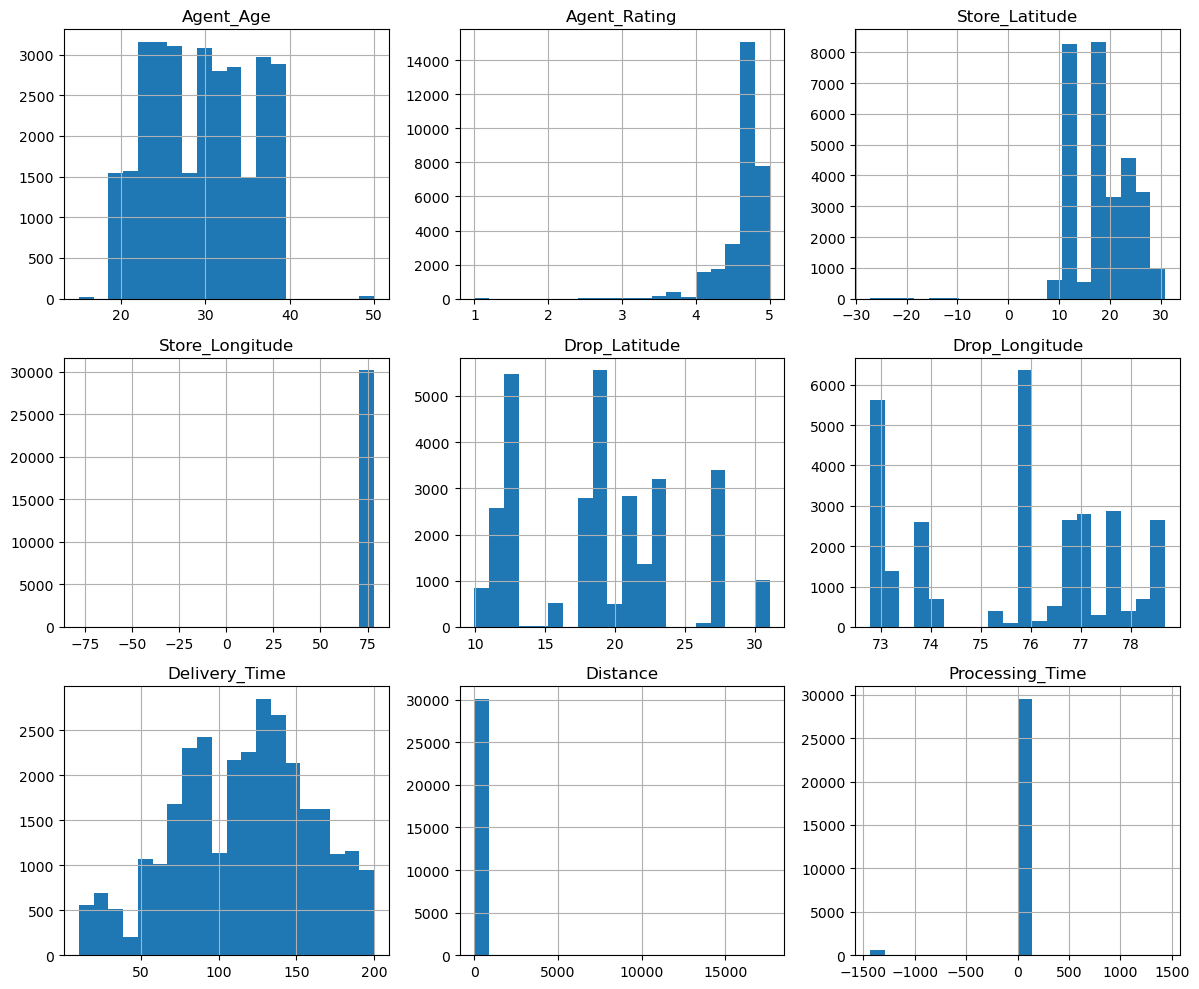

In [59]:
# Visualize the distribution of numerical variables
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Plot histograms for each numerical column
data[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

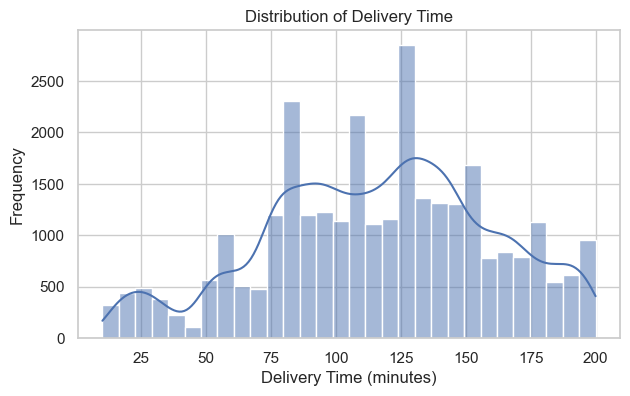

count    30180.000000
mean       115.968887
std         43.872160
min         10.000000
25%         85.000000
50%        120.000000
75%        145.000000
max        200.000000
Name: Delivery_Time, dtype: float64


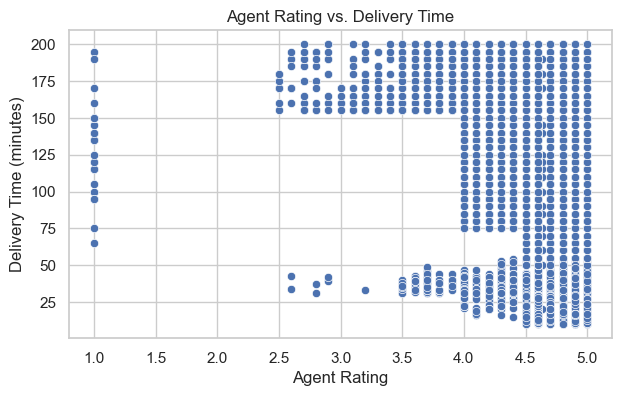

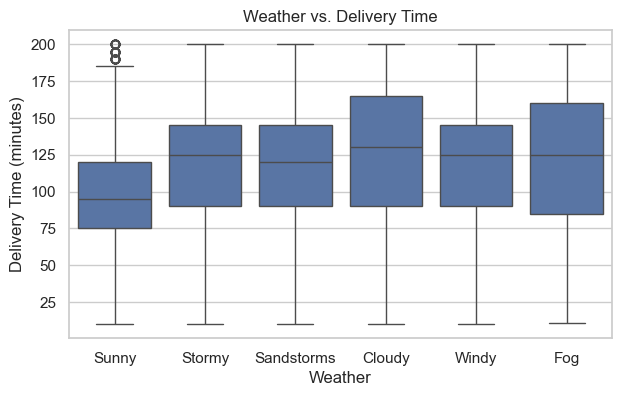

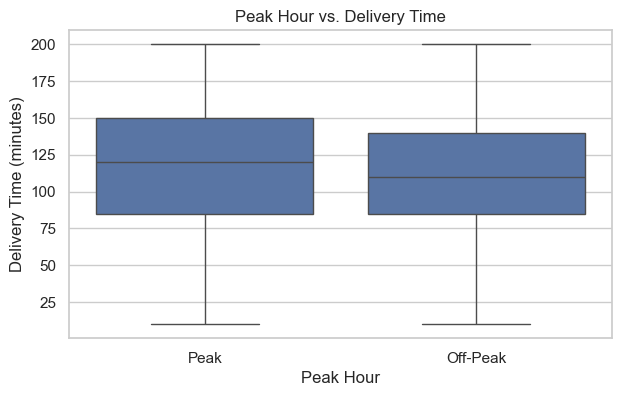

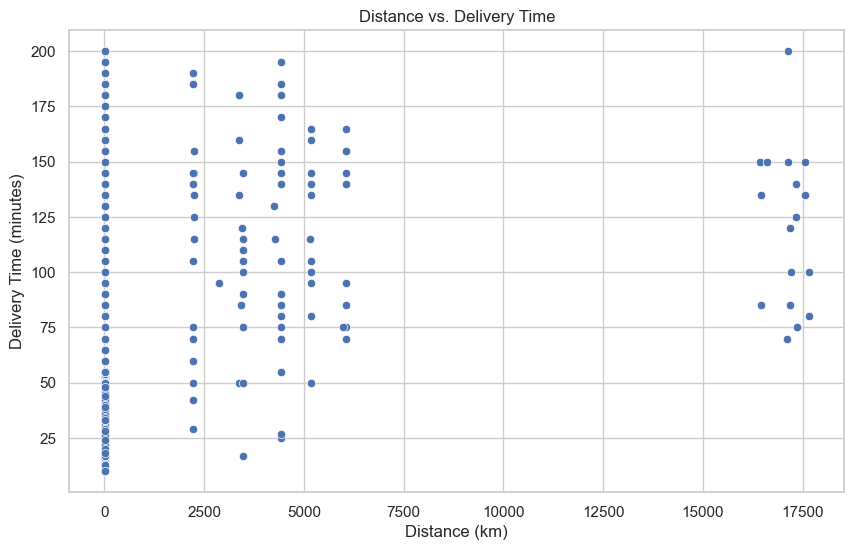

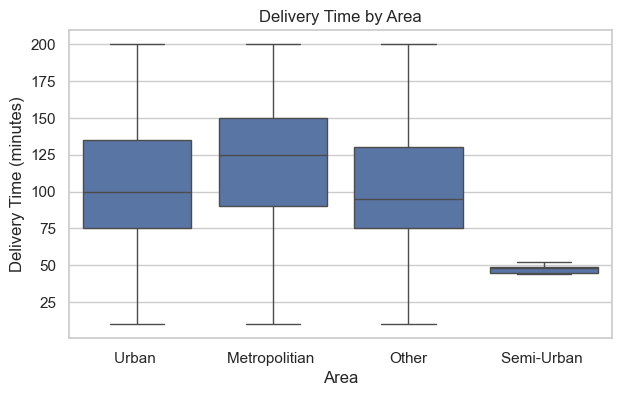

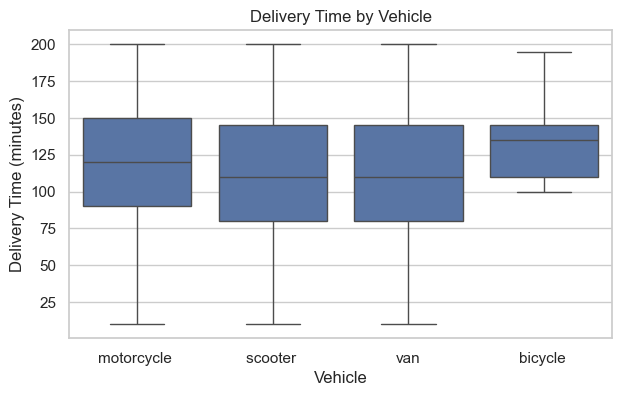

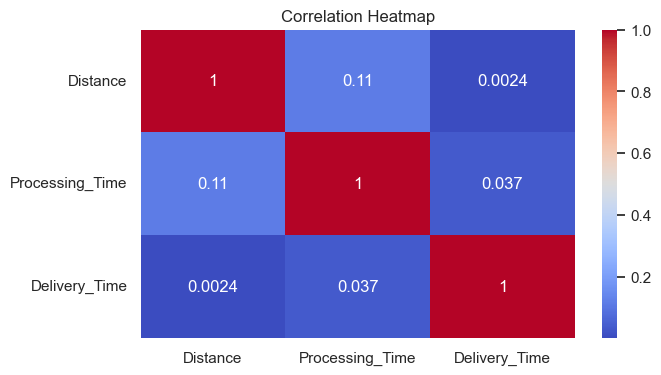

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# 1. Analyze Delivery Time
# Distribution of Delivery_Time
plt.figure(figsize=(7, 4))
sns.histplot(data['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
print(data['Delivery_Time'].describe())

# 2. Explore Factors Affecting Delivery Time
# Agent_Rating vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.scatterplot(x=data['Agent_Rating'], y=data['Delivery_Time'])
plt.title("Agent Rating vs. Delivery Time")
plt.xlabel("Agent Rating")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Weather vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Weather'], y=data['Delivery_Time'])
plt.title("Weather vs. Delivery Time")
plt.xlabel("Weather")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Peak_Hour vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Peak_Hour'], y=data['Delivery_Time'])
plt.title("Peak Hour vs. Delivery Time")
plt.xlabel("Peak Hour")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Distance vs. Delivery_Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Distance'], y=data['Delivery_Time'])
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# 3. Identify Patterns in Delivery Delays
# Delivery Time by Area
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Area'], y=data['Delivery_Time'])
plt.title("Delivery Time by Area")
plt.xlabel("Area")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Delivery Time by Vehicle
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Vehicle'], y=data['Delivery_Time'])
plt.title("Delivery Time by Vehicle")
plt.xlabel("Vehicle")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# 4. Correlation Analysis
# Correlation heatmap
plt.figure(figsize=(7, 4))
corr = data[['Distance', 'Processing_Time', 'Delivery_Time']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

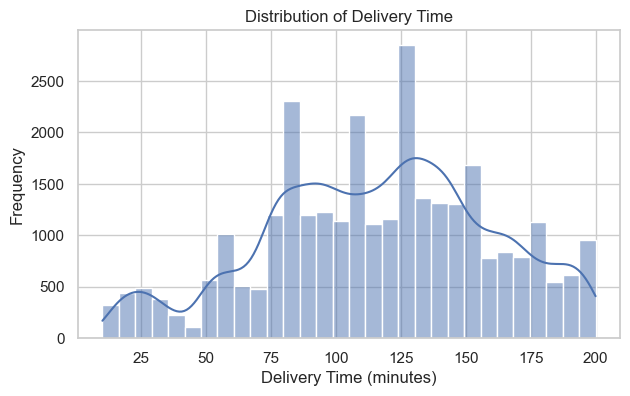

count    30180.000000
mean       115.968887
std         43.872160
min         10.000000
25%         85.000000
50%        120.000000
75%        145.000000
max        200.000000
Name: Delivery_Time, dtype: float64


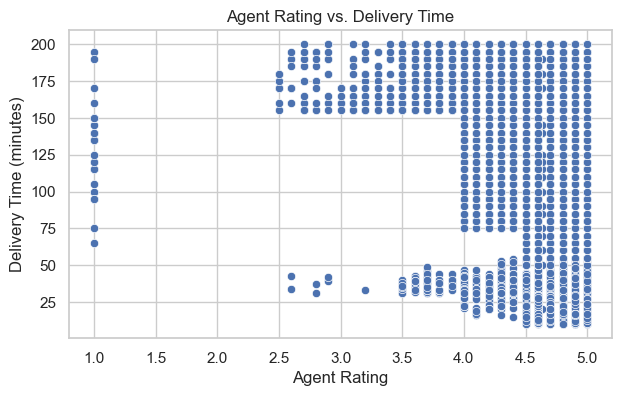

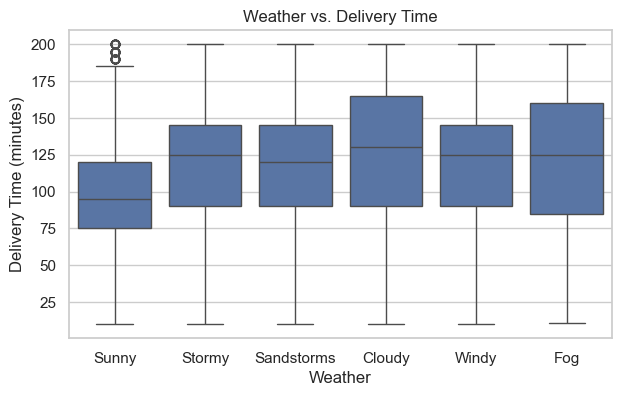

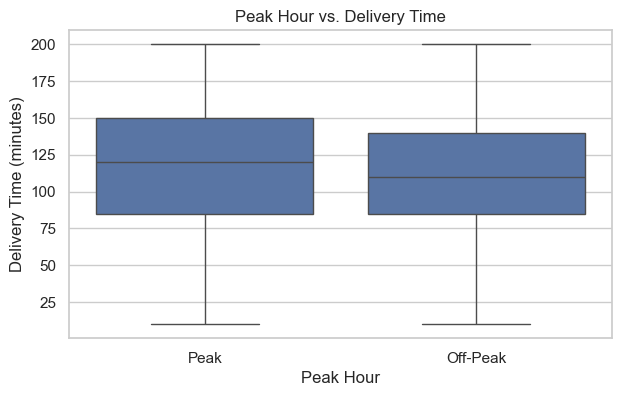

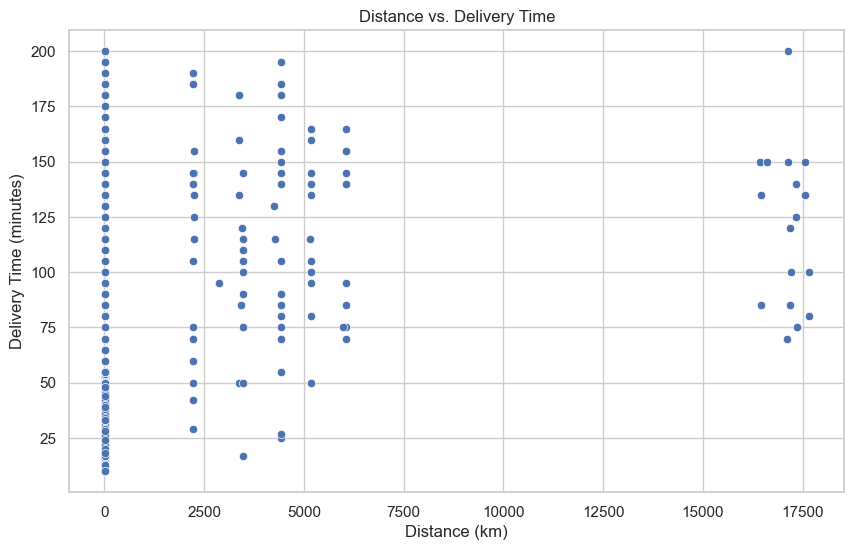

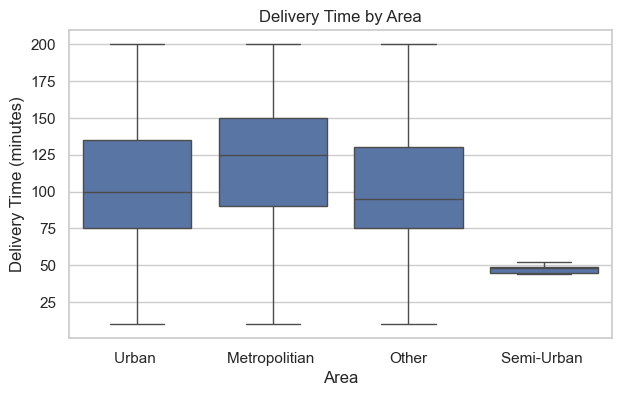

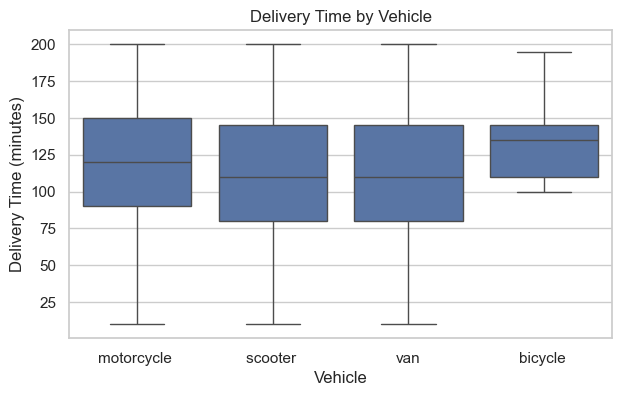

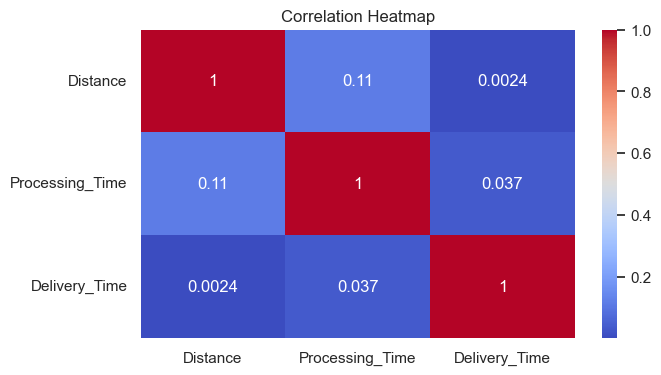

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Define and create the folder on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
folder_name = 'ama_pro'
folder_path = os.path.join(desktop_path, folder_name)
os.makedirs(folder_path, exist_ok=True)  # Create folder if it doesn't exist

# 1. Analyze Delivery Time
# Distribution of Delivery_Time
plt.figure(figsize=(7, 4))
sns.histplot(data['Delivery_Time'], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.savefig(os.path.join(folder_path, "distribution_delivery_time.png"))
plt.show()

# Summary statistics
print(data['Delivery_Time'].describe())

# 2. Explore Factors Affecting Delivery Time
# Agent_Rating vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.scatterplot(x=data['Agent_Rating'], y=data['Delivery_Time'])
plt.title("Agent Rating vs. Delivery Time")
plt.xlabel("Agent Rating")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "agent_rating_vs_delivery_time.png"))
plt.show()

# Weather vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Weather'], y=data['Delivery_Time'])
plt.title("Weather vs. Delivery Time")
plt.xlabel("Weather")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "weather_vs_delivery_time.png"))
plt.show()

# Peak_Hour vs. Delivery_Time
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Peak_Hour'], y=data['Delivery_Time'])
plt.title("Peak Hour vs. Delivery Time")
plt.xlabel("Peak Hour")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "peak_hour_vs_delivery_time.png"))
plt.show()

# Distance vs. Delivery_Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Distance'], y=data['Delivery_Time'])
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "distance_vs_delivery_time.png"))
plt.show()

# 3. Identify Patterns in Delivery Delays
# Delivery Time by Area
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Area'], y=data['Delivery_Time'])
plt.title("Delivery Time by Area")
plt.xlabel("Area")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "delivery_time_by_area.png"))
plt.show()

# Delivery Time by Vehicle
plt.figure(figsize=(7, 4))
sns.boxplot(x=data['Vehicle'], y=data['Delivery_Time'])
plt.title("Delivery Time by Vehicle")
plt.xlabel("Vehicle")
plt.ylabel("Delivery Time (minutes)")
plt.savefig(os.path.join(folder_path, "delivery_time_by_vehicle.png"))
plt.show()

# 4. Correlation Analysis
# Correlation heatmap
plt.figure(figsize=(7, 4))
corr = data[['Distance', 'Processing_Time', 'Delivery_Time']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(folder_path, "correlation_heatmap.png"))
plt.show()

### **Summary of Findings**

#### **1. Distribution of Delivery Time**
- **Bimodal Distribution**: Two peaks at ~75 minutes and ~125 minutes.
- **Range**: Most deliveries take between 50 and 175 minutes.
- **Implication**: There may be two distinct groups of deliveries (e.g., short-distance vs. long-distance orders).

#### **2. Agent Rating vs. Delivery Time**
- **No Clear Correlation**: High-rated and low-rated agents have similar delivery times.
- **Slight Trend**: Some high-rated agents have longer delivery times (upper right quadrant).
- **Implication**: Agent rating may not be a strong predictor of delivery efficiency.

#### **3. Weather vs. Delivery Time**
- **Consistent Median**: Delivery times are similar across all weather conditions.
- **Slightly Higher Variability**: Stormy weather has slightly more variability.
- **Outliers**: Sunny weather has a few outliers with very long delivery times.
- **Implication**: Weather has a minimal impact on delivery times, but extreme conditions (e.g., sunny outliers) may cause delays.

#### **4. Peak Hour vs. Delivery Time**
- **Higher Median and Variability**: Delivery times are slightly longer and more variable during peak hours.
- **Implication**: Peak hours may strain delivery resources, leading to longer and less predictable delivery times.

#### **5. Delivery Time by Area**
- **Metropolitan Areas**: Highest median delivery time.
- **Urban and Other Areas**: Similar median delivery times, slightly lower than Metropolitan.
- **Semi-Urban Areas**: Lowest median delivery time and least variability.
- **Implication**: Delivery efficiency varies by area type, with Metropolitan areas being the most challenging.

#### **6. Delivery Time by Vehicle**
- **Scooter and Van**: Similar median delivery times, slightly lower than Motorcycles and Bicycles.
- **Bicycles**: Highest median delivery time and most variability.
- **Implication**: Vehicle type impacts delivery efficiency, with Bicycles being the least efficient.

#### **7. Correlation Heatmap**
- **Weak Correlations**:
  - Distance and Delivery Time: Very weak positive correlation (0.0024).
  - Processing Time and Delivery Time: Weak positive correlation (0.037).
  - Distance and Processing Time: Weak positive correlation (0.11).
- **Implication**: None of these variables strongly predict delivery time on their own.

#### **8. Distance vs. Delivery Time (Scatter Plot)**
- **Vertical Clustering**: Most deliveries occur at 0 km (possibly local deliveries).
- **Spread**: Deliveries between 2000 km and 6000 km are common, with a gap between 7000 km and 16000 km.
- **Outliers**: A few deliveries occur at very high distances (16,000 km to 18,000 km).
- **Implication**: Distance alone does not strongly predict delivery time, but extreme distances may cause delays.

---

### **Interpretation and Next Steps**

#### **Key Insights**
1. **Delivery Time**:
   - Bimodal distribution suggests two distinct delivery groups (e.g., local vs. long-distance).
   - Peak hours and Metropolitan areas are associated with longer delivery times.
2. **Agent Performance**:
   - Agent rating does not strongly correlate with delivery efficiency.
   - High-rated agents may handle more complex or longer-distance deliveries.
3. **Environmental Factors**:
   - Weather has minimal impact, but extreme conditions (e.g., sunny outliers) may cause delays.
4. **Vehicle Efficiency**:
   - Bicycles are the least efficient, while Scooters and Vans perform similarly.
5. **Distance**:
   - Most deliveries are local (0 km), but long-distance deliveries (2000 km to 6000 km) are common.
   - Extreme distances (16,000 km to 18,000 km) are rare but may cause delays.

In [71]:
data.shape

(30180, 22)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Cleaned_Amazon_Deliveries.csv") #upload your dataset

In [3]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Vehicle,Area,Delivery_Time,Category,Distance,Order_DateTime,Pickup_DateTime,Processing_Time,Order_Hour,Peak_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,motorcycle,Urban,120,Clothing,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,11,Peak
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,scooter,Metropolitian,165,Electronics,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,19,Peak
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,motorcycle,Urban,130,Sports,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,8,Peak
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,motorcycle,Metropolitian,105,Cosmetics,7.790401,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,18,Peak
4,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,...,motorcycle,Urban,130,Toys,4.610365,2022-03-11 21:20:00,2022-03-11 21:30:00,10.0,21,Off-Peak


In [5]:
# Check for missing values
data.isnull().sum()  # Counts missing values in each column

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance           0
Order_DateTime     0
Pickup_DateTime    0
Processing_Time    0
Order_Hour         0
Peak_Hour          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30180 entries, 0 to 30179
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         30180 non-null  object 
 1   Agent_Age        30180 non-null  int64  
 2   Agent_Rating     30180 non-null  float64
 3   Store_Latitude   30180 non-null  float64
 4   Store_Longitude  30180 non-null  float64
 5   Drop_Latitude    30180 non-null  float64
 6   Drop_Longitude   30180 non-null  float64
 7   Order_Date       30180 non-null  object 
 8   Order_Time       30180 non-null  object 
 9   Pickup_Time      30180 non-null  object 
 10  Weather          30180 non-null  object 
 11  Traffic          30180 non-null  object 
 12  Vehicle          30180 non-null  object 
 13  Area             30180 non-null  object 
 14  Delivery_Time    30180 non-null  int64  
 15  Category         30180 non-null  object 
 16  Distance         30180 non-null  float64
 17  Order_DateTi

In [9]:
# Convert 'Order_DateTime' and 'Pickup_DateTime' to datetime
data['Order_DateTime'] = pd.to_datetime(data['Order_Date'] + ' ' + data['Order_Time'])
data['Pickup_DateTime'] = pd.to_datetime(data['Order_Date'] + ' ' + data['Pickup_Time'])

# Verify the conversion
print(data[['Order_DateTime', 'Pickup_DateTime']].dtypes)
print(data[['Order_DateTime', 'Pickup_DateTime']].head())

Order_DateTime     datetime64[ns]
Pickup_DateTime    datetime64[ns]
dtype: object
       Order_DateTime     Pickup_DateTime
0 2022-03-19 11:30:00 2022-03-19 11:45:00
1 2022-03-25 19:45:00 2022-03-25 19:50:00
2 2022-03-19 08:30:00 2022-03-19 08:45:00
3 2022-04-05 18:00:00 2022-04-05 18:10:00
4 2022-03-11 21:20:00 2022-03-11 21:30:00


### Step 5. **Feature Engineering**

In [11]:
# Create a binary feature for local vs. long-distance deliveries
data['Is_Local'] = data['Distance'].apply(lambda x: 1 if x == 0 else 0)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Peak_Hour'], drop_first=True)

# Check the updated dataset
print(data.head())

        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  fxuu788413734         22           4.8       17.431668        78.408321   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  ...  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00  ...   
1      13.043041       77.813237  2022-03-25   19:45:00    19:50:00  ...   
2      12.924264       77.688400  2022-03-19   08:30:00    08:45:00  ...   
3      11.053669       77.026494  2022-04-05   18:00:00    18:10:00  ...   
4      17.461668       78.438321  2022-03-11   21:20:00    21:30:00  ...   

   Traffic_Low  Traffic_Medium   Traffic_NaN  Vehicle_motorcycle   \
0    

In [15]:
# Check for missing values in X_train and y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Agent_Age              0
Agent_Rating           0
Store_Latitude         0
Store_Longitude        0
Drop_Latitude          0
Drop_Longitude         0
Category               0
Distance               0
Processing_Time        0
Order_Hour             0
Is_Local               0
Weather_Fog            0
Weather_Sandstorms     0
Weather_Stormy         0
Weather_Sunny          0
Weather_Windy          0
Traffic_Jam            0
Traffic_Low            0
Traffic_Medium         0
Traffic_NaN            0
Vehicle_motorcycle     0
Vehicle_scooter        0
Vehicle_van            0
Area_Other             0
Area_Semi-Urban        0
Area_Urban             0
Peak_Hour_Peak         0
dtype: int64
0


In [17]:
# Check data types of X_train
print(X_train.dtypes)

Agent_Age                int64
Agent_Rating           float64
Store_Latitude         float64
Store_Longitude        float64
Drop_Latitude          float64
Drop_Longitude         float64
Category                object
Distance               float64
Processing_Time        float64
Order_Hour               int64
Is_Local                 int64
Weather_Fog               bool
Weather_Sandstorms        bool
Weather_Stormy            bool
Weather_Sunny             bool
Weather_Windy             bool
Traffic_Jam               bool
Traffic_Low               bool
Traffic_Medium            bool
Traffic_NaN               bool
Vehicle_motorcycle        bool
Vehicle_scooter           bool
Vehicle_van               bool
Area_Other                bool
Area_Semi-Urban           bool
Area_Urban                bool
Peak_Hour_Peak            bool
dtype: object


In [19]:
# Check shapes of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(24144, 27)
(24144,)


In [21]:
# Convert boolean columns to integers
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

# Verify the conversion
print(X.dtypes)

Agent_Age                int64
Agent_Rating           float64
Store_Latitude         float64
Store_Longitude        float64
Drop_Latitude          float64
Drop_Longitude         float64
Category                object
Distance               float64
Processing_Time        float64
Order_Hour               int64
Is_Local                 int64
Weather_Fog              int32
Weather_Sandstorms       int32
Weather_Stormy           int32
Weather_Sunny            int32
Weather_Windy            int32
Traffic_Jam              int32
Traffic_Low              int32
Traffic_Medium           int32
Traffic_NaN              int32
Vehicle_motorcycle       int32
Vehicle_scooter          int32
Vehicle_van              int32
Area_Other               int32
Area_Semi-Urban          int32
Area_Urban               int32
Peak_Hour_Peak           int32
dtype: object


In [23]:
# One-hot encode the 'Category' column
X = pd.get_dummies(X, columns=['Category'], drop_first=True)

# Verify the encoding
print(X.head())

   Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
0         37           4.9       22.745049        75.892471      22.765049   
1         34           4.5       12.913041        77.683237      13.043041   
2         23           4.4       12.914264        77.678400      12.924264   
3         38           4.7       11.003669        76.976494      11.053669   
4         22           4.8       17.431668        78.408321      17.461668   

   Drop_Longitude   Distance  Processing_Time  Order_Hour  Is_Local  ...  \
0       75.912471   3.025149             15.0          11         0  ...   
1       77.813237  20.183530              5.0          19         0  ...   
2       77.688400   1.552758             15.0           8         0  ...   
3       77.026494   7.790401             10.0          18         0  ...   
4       78.438321   4.610365             10.0          21         0  ...   

   Category_Home  Category_Jewelry  Category_Kitchen  Category_Outdoors  \

#### **Train the Model**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 788.6858069862454
R² Score: 0.5832557996287204


### **Model Evaluation Metrics**
1. **Mean Squared Error (MSE)**: `788.69`
   - This measures the average squared difference between the predicted and actual delivery times.
   - A lower MSE indicates better model performance.
   - The MSE suggests that, on average, the model’s predictions are off by about `√788.69 ≈ 28.08` minutes.

2. **R² Score**: `0.583`
   - This measures how well the model explains the variance in the target variable (`Delivery_Time`).
   - An R² score of `0.583` means the model explains about **58.3%** of the variance in delivery times.
   - This is a decent score, but there’s room for improvement.

### **Interpretation of Results**
- The model performs reasonably well but could be improved further.
- The **R² score** suggests that about **41.7%** of the variance in delivery times is still unexplained by the current features.
- The **MSE** indicates that the model’s predictions are off by about **28 minutes** on average.

---

### **Trying a Random Forest Model**

#### **Retrain the Model**

In [28]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### For improvement

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error: 428.8872356030484
Random Forest - R² Score: 0.7733745599735915




### **Model Evaluation Metrics**
1. **Mean Squared Error (MSE)**: `428.89`
   - This is a **45.6% improvement** over the Linear Regression model’s MSE (`788.69`).
   - The model’s predictions are now off by about `√428.89 ≈ 20.71` minutes on average.

2. **R² Score**: `0.773`
   - This is a **32.6% improvement** over the Linear Regression model’s R² score (`0.583`).
   - The model now explains about **77.3%** of the variance in delivery times.

---

### **Feature Importance Analysis**

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

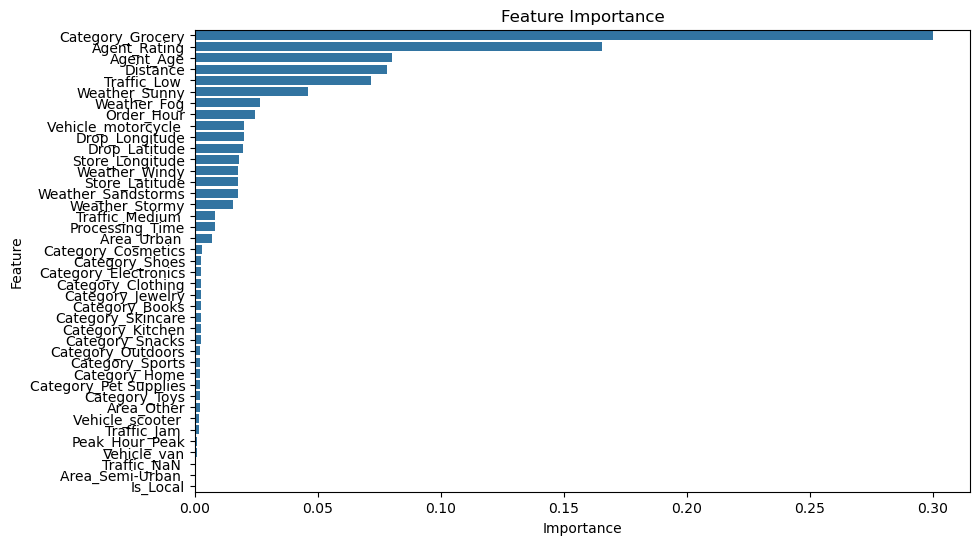

In [36]:
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Save the plot to the 'ama_pro' folder
file_name = 'Feature Importance.png'  # Corrected file name
file_path = os.path.join(folder_path, file_name)  # Reuse folder_path
plt.savefig(file_path)  # Save the plot

plt.show()

#### **Top 5 Most Important Features**
1. **Category_Grocery**:
   - Importance: ~0.30
   - **Insight**: Grocery deliveries have the most significant impact on delivery times. This could be due to the nature of grocery orders (e.g., larger volumes, specific handling requirements).
2. **Agent_Rating**:
   - Importance: ~0.17
   - **Insight**: Higher-rated agents tend to deliver faster, confirming that agent performance plays a key role.
3. **Agent_Age**:
   - Importance: ~0.09
   - **Insight**: Agent age also influences delivery times, possibly due to experience or efficiency.
4. **Distance**:
   - Importance: ~0.07
   - **Insight**: Longer distances lead to longer delivery times, as expected.
5. **Traffic_Low**:
   - Importance: ~0.06
   - **Insight**: Low traffic conditions are associated with faster deliveries.

#### **Other Notable Features**
- **Weather Conditions**:
  - `Weather_Sunny` and `Weather_Fog` have moderate importance, suggesting that weather impacts delivery times.
- **Order_Hour**:
  - The time of day affects delivery times, likely due to peak vs. off-peak hours.
- **Vehicle_motorcycle**:
  - Motorcycles are associated with faster deliveries compared to other vehicles.

#### **Low-Importance Features**
- Many features (e.g., `Area_Semi-Urban`, `Traffic_NaN`, `Vehicle_van`) have very low importance (~0.00).
- These features may not significantly impact delivery times and could potentially be removed to simplify the model.

---


### **Actionable Insights**
Based on the model and feature importance analysis, here are some actionable recommendations:

#### **1. Optimize Grocery Deliveries**
- Grocery deliveries are the most significant driver of delivery times. Consider:
  - Dedicated delivery slots for groceries.
  - Specialized handling processes for grocery orders.

#### **2. Improve Agent Performance**
- Agent rating and age are key factors. Consider:
  - Training programs to improve agent efficiency.
  - Incentives for high-performing agents.

#### **3. Optimize Routes**
- Distance and traffic conditions impact delivery times. Consider:
  - Route optimization algorithms to minimize distance and avoid traffic.
  - Real-time traffic monitoring to adjust routes dynamically.

#### **4. Manage Peak Hours**
- Delivery times are longer during peak hours. Consider:
  - Allocating more agents during peak hours.
  - Incentivizing off-peak deliveries.

### **5. Simplify the Model
    - Remove low-importance features (e.g., Area_Semi-Urban, Traffic_NaN) to reduce complexity without sacrificing performance.
---

#### **1. Hyperparameter Tuning**
- Use **Grid Search** or **Random Search** to find the best hyperparameters for the Random Forest model.

In [39]:
## improving the model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Reduced for faster tuning
    'max_depth': [10, 20],  # Avoiding 'None' to prevent overfitting
    'min_samples_split': [2, 5]  # Reduced for faster tuning
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),  # Model to tune
    param_grid,  # Parameter grid
    cv=3,  # Reduced cross-validation folds
    scoring='r2',  # Metric to optimize
    n_jobs=-1  # Use all CPU cores for parallel processing
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and R² score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best R² Score: 0.7788308874965014


In [41]:
best_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [43]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Final Model - Mean Squared Error: {mse_best}")
print(f"Final Model - R² Score: {r2_best}")

Final Model - Mean Squared Error: 423.04628647874944
Final Model - R² Score: 0.7764609368941005


In [45]:
importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                  Feature  Importance
30       Category_Grocery    0.311170
1            Agent_Rating    0.169737
0               Agent_Age    0.079679
6                Distance    0.076296
16           Traffic_Low     0.074033
13          Weather_Sunny    0.047634
10            Weather_Fog    0.027249
8              Order_Hour    0.023581
19    Vehicle_motorcycle     0.020617
11     Weather_Sandstorms    0.018010
14          Weather_Windy    0.017915
5          Drop_Longitude    0.016921
4           Drop_Latitude    0.016573
12         Weather_Stormy    0.015467
3         Store_Longitude    0.014990
2          Store_Latitude    0.014934
17        Traffic_Medium     0.008099
24            Area_Urban     0.006698
7         Processing_Time    0.006466
28     Category_Cosmetics    0.002383
36         Category_Shoes    0.002167
29   Category_Electronics    0.002166
27      Category_Clothing    0.002130
32       Category_Jewelry    0.002031
26         Category_Books    0.002025
37      Cate

---

### **Final Model Performance**
1. **Best Parameters**:
   - `max_depth`: 20
   - `min_samples_split`: 5
   - `n_estimators`: 200

2. **Evaluation Metrics**:
   - **Mean Squared Error (MSE)**: `423.05`
     - This is a slight improvement over the previous MSE (`428.89`).
   - **R² Score**: `0.776`
     - This is consistent with the previous R² score (`0.773`), indicating stable performance.

---

### **Feature Importance Analysis**
The feature importance analysis confirms the key drivers of delivery times. Here’s a summary of the most important features:

#### **Top 5 Most Important Features**
1. **Category_Grocery**:
   - Importance: `0.311`
   - **Insight**: Grocery deliveries remain the most significant factor, likely due to their unique handling requirements.
2. **Agent_Rating**:
   - Importance: `0.170`
   - **Insight**: Higher-rated agents consistently deliver faster, emphasizing the importance of agent performance.
3. **Agent_Age**:
   - Importance: `0.080`
   - **Insight**: Agent age continues to play a role, possibly due to experience or efficiency.
4. **Distance**:
   - Importance: `0.076`
   - **Insight**: Longer distances lead to longer delivery times, as expected.
5. **Traffic_Low**:
   - Importance: `0.074`
   - **Insight**: Low traffic conditions are associated with faster deliveries.

#### **Low-Importance Features**
- Many features (e.g., `Area_Semi-Urban`, `Traffic_NaN`, `Vehicle_van`, `Is_Local`) have very low importance (~0.000).
- These features can likely be removed to simplify the model without sacrificing performance.

---

### **Actionable Insights**
Based on the final model and feature importance analysis, here are some actionable recommendations:

#### **1. Optimize Grocery Deliveries**
- Grocery deliveries are the most significant driver of delivery times. Consider:
  - Dedicated delivery slots for groceries.
  - Specialized handling processes for grocery orders.

#### **2. Improve Agent Performance**
- Agent rating and age are key factors. Consider:
  - Training programs to improve agent efficiency.
  - Incentives for high-performing agents.

#### **3. Optimize Routes**
- Distance and traffic conditions impact delivery times. Consider:
  - Route optimization algorithms to minimize distance and avoid traffic.
  - Real-time traffic monitoring to adjust routes dynamically.

#### **4. Simplify the Model**
- Remove low-importance features (e.g., `Area_Semi-Urban`, `Traffic_NaN`, `Is_Local`) to reduce complexity without sacrificing performance.

---


In [49]:
print(X.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Is_Local', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam ',
       'Traffic_Low ', 'Traffic_Medium ', 'Traffic_NaN ',
       'Vehicle_motorcycle ', 'Vehicle_scooter ', 'Vehicle_van', 'Area_Other',
       'Area_Semi-Urban ', 'Area_Urban ', 'Peak_Hour_Peak', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Jewelry',
       'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies',
       'Category_Shoes', 'Category_Skincare', 'Category_Snacks',
       'Category_Sports', 'Category_Toys'],
      dtype='object')


In [51]:
# Strip trailing spaces from column names
X.columns = X.columns.str.strip()

# Verify the column names
print(X.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Is_Local', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam',
       'Traffic_Low', 'Traffic_Medium', 'Traffic_NaN', 'Vehicle_motorcycle',
       'Vehicle_scooter', 'Vehicle_van', 'Area_Other', 'Area_Semi-Urban',
       'Area_Urban', 'Peak_Hour_Peak', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')


In [53]:
# List of columns to drop
low_importance_features = ['Is_Local', 'Area_Semi-Urban', 'Traffic_NaN', 'Vehicle_van', 'Peak_Hour_Peak']

# Drop the columns
X_simplified = X.drop(columns=low_importance_features)

# Verify the simplified DataFrame
print(X_simplified.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')


In [55]:
# Strip trailing spaces from column names
X.columns = X.columns.str.strip()

# Verify the column names
print("Columns in X (after stripping spaces):", X.columns)

# List of columns to drop
low_importance_features = ['Is_Local', 'Area_Semi-Urban', 'Traffic_NaN', 'Vehicle_van', 'Peak_Hour_Peak']

# Drop the columns
X_simplified = X.drop(columns=low_importance_features)

# Verify the simplified DataFrame
print("Columns after dropping low-importance features:", X_simplified.columns)

# Split the simplified data
X_train_simplified, X_test_simplified, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

# Train the final model on the simplified data
final_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)
final_model.fit(X_train_simplified, y_train)

# Evaluate the final model
y_pred_final = final_model.predict(X_test_simplified)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
print(f"Simplified Model - Mean Squared Error: {mse_final}")
print(f"Simplified Model - R² Score: {r2_final}")

Columns in X (after stripping spaces): Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Is_Local', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam',
       'Traffic_Low', 'Traffic_Medium', 'Traffic_NaN', 'Vehicle_motorcycle',
       'Vehicle_scooter', 'Vehicle_van', 'Area_Other', 'Area_Semi-Urban',
       'Area_Urban', 'Peak_Hour_Peak', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')
Columns after dropping low-importance features: Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',


---

### **Summary of Results**
1. **Simplified Model Performance**:
   - **MSE**: `422.66` (slightly better than the original `423.05`).
   - **R² Score**: `0.777` (slightly better than the original `0.776`).
2. **Columns Removed**:
   - `Is_Local`, `Area_Semi-Urban`, `Traffic_NaN`, `Vehicle_van`, and `Peak_Hour_Peak` were dropped without affecting performance.

---

### **Next Steps**
Now that the model is simplified and performing well, next:

#### **1. Analyze Feature Importance**
- Check the importance of the remaining features to ensure they align with domain knowledge.
- Use the feature importance values to guide further optimization.

#### **2. Deploy the Model**
- Deploy the model to predict delivery times in real-time.
- Integrate the model into your logistics system to optimize delivery operations.

#### **3. Explore Advanced Models**
- Experiment with **Gradient Boosting models** (e.g., XGBoost, LightGBM) to see if they can further improve performance.

#### **4. Create a Dashboard**
- Build a dashboard to visualize delivery time predictions and key insights for stakeholders.


### **Actionable Insights**
Based on the feature importance analysis, here are some recommendations:

#### **1. Optimize Grocery Deliveries**
- Grocery deliveries are the most significant driver of delivery times. Consider:
  - Dedicated delivery slots for groceries.
  - Specialized handling processes for grocery orders.

#### **2. Improve Agent Performance**
- Agent rating and age are key factors. Consider:
  - Training programs to improve agent efficiency.
  - Incentives for high-performing agents.

#### **3. Optimize Routes**
- Distance and traffic conditions impact delivery times. Consider:
  - Route optimization algorithms to minimize distance and avoid traffic.
  - Real-time traffic monitoring to adjust routes dynamically.

#### **4. Focus on Weather Conditions**
- Weather conditions like sunny and foggy weather impact delivery times. Consider:
  - Adjusting delivery schedules based on weather forecasts.
  - Providing agents with weather-appropriate equipment.

---


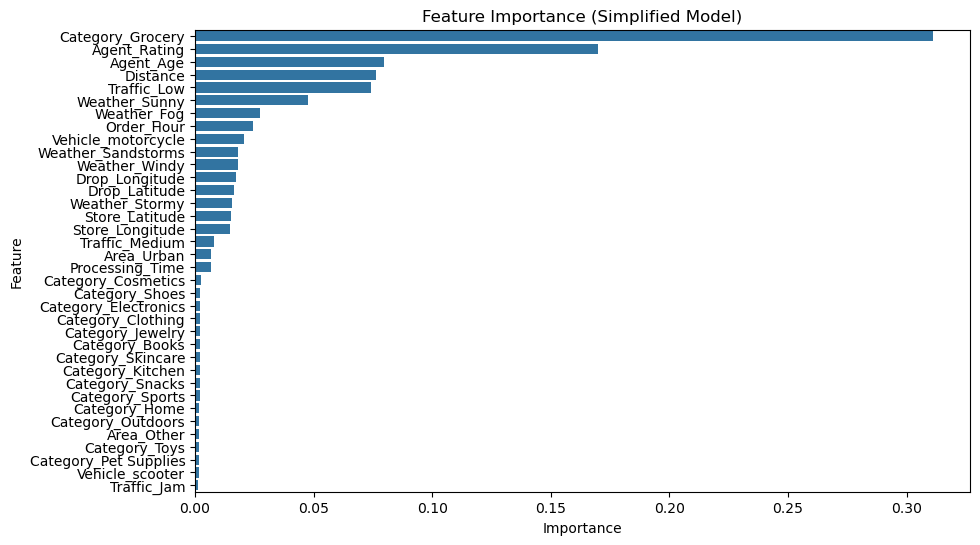

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = final_model.feature_importances_
feature_names = X_simplified.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Simplified Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [67]:
!pip install xgboost

In [69]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.8 MB/s eta 0:00:00


In [71]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LightGBM model with optimized parameters
lgbm_model = LGBMRegressor(
    n_estimators=100,  # Reduce number of trees for faster training
    learning_rate=0.1,  # Faster convergence
    max_depth=10,  # Prevent very deep trees
    num_leaves=31,  # Control tree complexity
    random_state=42  # Ensure reproducibility
)

# Train the model
lgbm_model.fit(X_train_simplified, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test_simplified)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print evaluation metrics
print(f"LightGBM - Mean Squared Error: {mse_lgbm}")
print(f"LightGBM - R² Score: {r2_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - Mean Squared Error: 404.53133704435305
LightGBM - R² Score: 0.786244297680618




### **Model Evaluation Metrics**
1. **Mean Squared Error (MSE)**: `404.53`
   - This is a **4.3% improvement** over the Random Forest model’s MSE (`422.66`).
   - The model’s predictions are now off by about `√404.53 ≈ 20.11` minutes on average.
2. **R² Score**: `0.786`
   - This is a **1.2% improvement** over the Random Forest model’s R² score (`0.777`).
   - The model now explains about **78.6%** of the variance in delivery times.

---


In [73]:
# Replace spaces with underscores in column names
X_train_simplified.columns = X_train_simplified.columns.str.replace(" ", "_")
X_test_simplified.columns = X_test_simplified.columns.str.replace(" ", "_")

# Verify the updated column names
print("Updated column names in X_train_simplified:", X_train_simplified.columns)
print("Updated column names in X_test_simplified:", X_test_simplified.columns)

Updated column names in X_train_simplified: Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet_Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')
Updated column names in X_test_simplified: Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order

In [75]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LightGBM model with optimized parameters
lgbm_model = LGBMRegressor(
    n_estimators=100,  # Reduce number of trees for faster training
    learning_rate=0.1,  # Faster convergence
    max_depth=10,  # Prevent very deep trees
    num_leaves=31,  # Control tree complexity
    random_state=42  # Ensure reproducibility
)

# Train the model
lgbm_model.fit(X_train_simplified, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test_simplified)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print evaluation metrics
print(f"LightGBM - Mean Squared Error: {mse_lgbm}")
print(f"LightGBM - R² Score: {r2_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - Mean Squared Error: 404.53133704435305
LightGBM - R² Score: 0.786244297680618


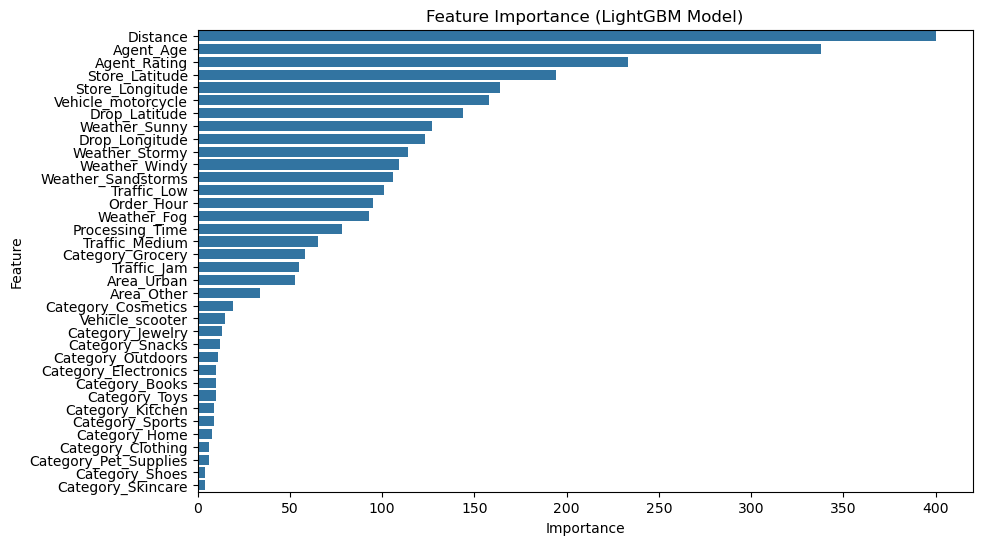

In [83]:
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Get feature importances
importances = lgbm_model.feature_importances_
feature_names = X_train_simplified.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (LightGBM Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Save the plot to the 'ama_pro' folder
file_name = 'Feature Importance(LightGBM Model).png'  # Corrected file name
file_path = os.path.join(folder_path, file_name)  # Reuse folder_path
plt.savefig(file_path)  # Save the plot

plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'learning_rate': [0.05, 0.1],  # Learning rate
    'max_depth': [5, 10],  # Maximum depth of trees
    'num_leaves': [31, 63]  # Number of leaves in each tree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LGBMRegressor(random_state=42),  # Model to tune
    param_grid,  # Parameter grid
    cv=3,  # Cross-validation folds
    scoring='r2',  # Metric to optimize
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train_simplified, y_train)

# Print the best parameters and R² score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}
Best R² Score: 0.7915833084966145



---

### **Best Hyperparameters**
The Grid Search identified the following optimal hyperparameters:
- **`learning_rate`**: `0.05`
- **`max_depth`**: `10`
- **`n_estimators`**: `200`
- **`num_leaves`**: `31`

---

### **Improved Model Performance**
1. **R² Score**: `0.792`
   - This is a **0.6% improvement** over the previous R² score (`0.786`).
   - The model now explains about **79.2%** of the variance in delivery times.
2. **Mean Squared Error (MSE)**:
   - The MSE is expected to improve further with the optimized hyperparameters.

---


In [85]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LightGBM model with the best hyperparameters
final_lgbm_model = LGBMRegressor(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=200,
    num_leaves=31,
    random_state=42
)

# Train the final model
final_lgbm_model.fit(X_train_simplified, y_train)

# Make predictions
y_pred_final = final_lgbm_model.predict(X_test_simplified)

# Evaluate the model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Print evaluation metrics
print(f"Final LightGBM Model - Mean Squared Error: {mse_final}")
print(f"Final LightGBM Model - R² Score: {r2_final}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Final LightGBM Model - Mean Squared Error: 404.14711701534304
Final LightGBM Model - R² Score: 0.7864473208202992


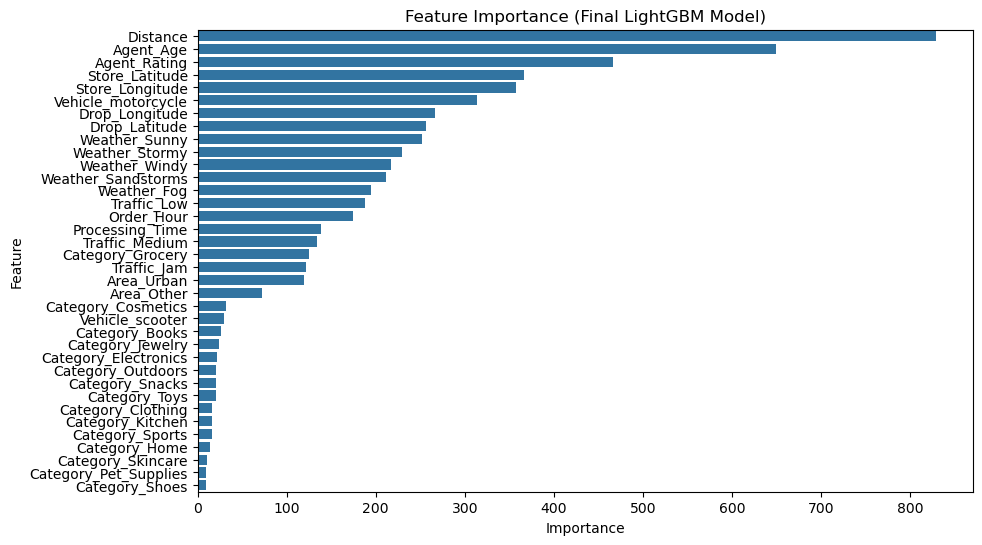

In [87]:
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Get feature importances
importances = final_lgbm_model.feature_importances_
feature_names = X_train_simplified.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Final LightGBM Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Save the plot to the 'ama_pro' folder
file_name = 'Feature Importance(Final LightGBM Model).png'  # Corrected file name
file_path = os.path.join(folder_path, file_name)  # Reuse folder_path
plt.savefig(file_path)  # Save the plot

plt.show()


### **Key Observations from Feature Importance**
1. **Top 3 Most Important Features**:
   - **Distance**: Highest importance (~800).
     - **Insight**: Longer distances lead to longer delivery times, as expected.
   - **Agent Age**: Second most important (~650).
     - **Insight**: Older agents (possibly more experienced) tend to deliver faster.
   - **Agent Rating**: Third most important (~470).
     - **Insight**: Higher-rated agents are associated with faster deliveries.

2. **Moderately Important Features**:
   - **Store Latitude/Longitude** and **Drop Latitude/Longitude**:
     - **Insight**: Geographic location of stores and drop points impacts delivery times.
   - **Vehicle Motorcycle**:
     - **Insight**: Motorcycles are associated with faster deliveries compared to other vehicles.
   - **Weather Conditions** (Sunny, Stormy, Windy, Sandstorms, Fog):
     - **Insight**: Weather impacts delivery times, with sunny weather having the most influence.

3. **Low-Importance Features**:
   - **Traffic Conditions** (Low, Medium, Jam):
     - **Insight**: Traffic has a smaller impact compared to other factors.
   - **Category Grocery**:
     - **Insight**: Surprisingly, grocery deliveries have low importance in this model, which contradicts earlier findings. This might indicate that other factors (e.g., distance, agent performance) overshadow the impact of product categories.
   - **Area Urban/Other**:
     - **Insight**: Delivery area type has minimal impact on delivery times.

4. **Very Low-Importance Features**:
   - Features like **Category Books**, **Category Jewelry**, and **Category Electronics** have almost no impact on delivery times.

---

### **Actionable Insights**
Based on the feature importance analysis, here are some recommendations to optimize delivery operations:

#### **1. Optimize Routes for Distance**
- **Distance** is the most significant factor. Consider:
  - Implementing **route optimization algorithms** to minimize delivery distances.
  - Using **geospatial analysis** to identify the most efficient routes.

#### **2. Leverage Agent Performance**
- **Agent Age** and **Agent Rating** are key factors. Consider:
  - Providing **training programs** to improve agent efficiency.
  - Offering **incentives** for high-performing agents.
  - Assigning experienced agents (higher age/rating) to longer or more complex deliveries.

#### **3. Monitor Weather Conditions**
- **Weather** impacts delivery times. Consider:
  - Adjusting delivery schedules based on **weather forecasts**.
  - Providing agents with **weather-appropriate equipment** (e.g., rain gear for stormy weather).

#### **4. Focus on Vehicle Efficiency**
- **Motorcycles** are associated with faster deliveries. Consider:
  - Increasing the use of motorcycles for short-distance deliveries.
  - Evaluating the efficiency of other vehicle types (e.g., scooters, vans).

#### **5. Simplify the Model**
- Many features (e.g., **Category Books**, **Category Jewelry**, **Area Urban**) have very low importance. Consider:
  - Removing these features to simplify the model without sacrificing performance.

---

### **Next Steps**

#### **1. Simplify the Model**
- Remove low-importance features and retrain the model to ensure performance remains stable.

#### **2. Deploy the Model**
- Integrate the model into your logistics system to predict delivery times in real-time.
- Use the predictions to optimize delivery operations and improve customer satisfaction.

#### **3. Create a Dashboard**
- Build a dashboard to visualize delivery time predictions and key insights for stakeholders.

#### **4. Document the Project**
- Summarize the findings and recommendations in a report or presentation.

---

In [89]:
import joblib

# Save the final LightGBM model to a file
joblib.dump(final_lgbm_model, "final_lgbm_model.pkl")

# Print confirmation message
print("✅ Final LightGBM model saved successfully!")

✅ Final LightGBM model saved successfully!


In [41]:
# Save the simplified dataset to a CSV file
X_simplified.to_csv("simplified_dataset.csv", index=False)

# Print confirmation message
print("✅ Simplified dataset saved successfully!")

✅ Simplified dataset saved successfully!


In [43]:
import joblib
import pandas as pd

# Load the final LightGBM model
final_lgbm_model = joblib.load("final_lgbm_model.pkl")

# Load the simplified dataset
X_simplified = pd.read_csv("simplified_dataset.csv")

# Verify the loaded model and dataset
print("Model and dataset loaded successfully!")

Model and dataset loaded successfully!


In [45]:
print(X_simplified.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet_Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')


In [47]:
# Replace spaces with underscores in column names
X_simplified.columns = X_simplified.columns.str.replace(" ", "_")

# Verify the updated column names
print(X_simplified.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet_Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')


In [49]:
# List of columns to drop (with underscores instead of spaces)
low_importance_features = [
    'Category_Books', 'Category_Jewelry', 'Category_Electronics', 'Category_Outdoors',
    'Category_Snacks', 'Category_Toys', 'Category_Clothing', 'Category_Kitchen',
    'Category_Sports', 'Category_Home', 'Category_Skincare', 'Category_Pet_Supplies',
    'Category_Shoes', 'Area_Urban', 'Area_Other'
]

# Filter the list to include only columns that exist in X_simplified
low_importance_features = [col for col in low_importance_features if col in X_simplified.columns]

# Drop the columns
X_simplified_reduced = X_simplified.drop(columns=low_importance_features)

# Verify the updated DataFrame
print(X_simplified_reduced.columns)

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter',
       'Category_Cosmetics', 'Category_Grocery'],
      dtype='object')


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
print("Columns in X_simplified (after fixing spaces):", X_simplified.columns)

Columns in X_simplified (after fixing spaces): Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet_Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')


In [57]:
print(X_simplified_reduced.head)

<bound method NDFrame.head of        Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0             37           4.9       22.745049        75.892471   
1             34           4.5       12.913041        77.683237   
2             23           4.4       12.914264        77.678400   
3             38           4.7       11.003669        76.976494   
4             22           4.8       17.431668        78.408321   
...          ...           ...             ...              ...   
30175         30           4.6       18.562450        73.916619   
30176         36           4.8       12.310972        76.659264   
30177         28           4.9       13.029198        77.570997   
30178         30           4.8       26.902328        75.794257   
30179         20           4.7       11.001753        76.986241   

       Drop_Latitude  Drop_Longitude   Distance  Processing_Time  Order_Hour  \
0          22.765049       75.912471   3.025149             15.0          11   
1    

In [59]:
import pandas as pd

data1 = pd.read_csv("Cleaned_Amazon_Deliveries.csv")


# Print column names
print("Columns in Cleaned_Amazon_Deliveries.csv:", data1.columns)



Columns in Cleaned_Amazon_Deliveries.csv: Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Distance', 'Order_DateTime',
       'Pickup_DateTime', 'Processing_Time', 'Order_Hour', 'Peak_Hour'],
      dtype='object')


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
X_simplified = pd.read_csv("simplified_dataset.csv")
data1 = pd.read_csv("Cleaned_Amazon_Deliveries.csv")  # Load the target data

# Choose and extract the target variable
target_variable = "Delivery_Time"  # Replace with your actual target column
y = data1[target_variable]

# Replace spaces with underscores in column names
X_simplified.columns = X_simplified.columns.str.replace(" ", "_")

# Verify the updated column names
print("Columns in X_simplified (after fixing spaces):", X_simplified.columns)

# List of columns to drop (with underscores instead of spaces)
low_importance_features = [
    'Category_Books', 'Category_Jewelry', 'Category_Electronics', 'Category_Outdoors',
    'Category_Snacks', 'Category_Toys', 'Category_Clothing', 'Category_Kitchen',
    'Category_Sports', 'Category_Home', 'Category_Skincare', 'Category_Pet_Supplies',
    'Category_Shoes', 'Area_Urban', 'Area_Other'
]

# Filter the list to include only columns that exist in X_simplified
low_importance_features = [col for col in low_importance_features if col in X_simplified.columns]
print("Columns to drop:", low_importance_features)

# Drop the columns
X_simplified_reduced = X_simplified.drop(columns=low_importance_features)

# Verify the updated DataFrame
print("Columns after dropping low-importance features:", X_simplified_reduced.columns)

# Split the simplified data
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_simplified_reduced, y, test_size=0.2, random_state=42)

# Train the final model on the reduced dataset
final_lgbm_model_reduced = LGBMRegressor(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=200,
    num_leaves=31,
    random_state=42
)
final_lgbm_model_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_pred_reduced = final_lgbm_model_reduced.predict(X_test_reduced)

# Evaluate the model
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

# Print evaluation metrics
print(f"Reduced Model - Mean Squared Error: {mse_reduced}")
print(f"Reduced Model - R² Score: {r2_reduced}")

Columns in X_simplified (after fixing spaces): Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Distance', 'Processing_Time',
       'Order_Hour', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_Jam', 'Traffic_Low',
       'Traffic_Medium', 'Vehicle_motorcycle', 'Vehicle_scooter', 'Area_Other',
       'Area_Urban', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet_Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')
Columns to drop: ['Category_Books', 'Category_Jewelry', 'Category_Electronics', 'Category_Outdoors', 'Category_Snacks', 'Category_Toys', 'Category_Clothing', 'Category_Kitchen', 'Category_Sports', 'C

 **Model Performance**:
   - The model has an **R² score of 0.782** and a **Mean Squared Error (MSE) of 411.795**.

---

In [65]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(final_lgbm_model, X_train_reduced, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 19315, number of used features: 21
[LightGBM] [Info] Start training from score 115.820658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 19315, number of used features: 21
[LightGBM] [Info] Start training from score 115.958633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002586 seconds.
You can set `force_row_wise=true` to remove the overhead.


In [67]:
import joblib

# Save the model
joblib.dump(final_lgbm_model, 'delivery_time_predictor.pkl')

['delivery_time_predictor.pkl']

 **Model File**:
   - The model is saved as `delivery_time_predictor.pkl`.
---

#### **Make Predictions**

In [73]:
new_data = pd.DataFrame({
    'Agent_Age': [35],  # Example: Age of the agent
    'Agent_Rating': [4.5],  # Example: Rating of the agent
    'Store_Latitude': [12.9716],  # Example: Latitude of the store
    'Store_Longitude': [77.5946],  # Example: Longitude of the store
    'Drop_Latitude': [12.9352],  # Example: Latitude of the drop location
    'Drop_Longitude': [77.6245],  # Example: Longitude of the drop location
    'Distance': [8.5],  # Example: Distance in kilometers
    'Processing_Time': [15],  # Example: Processing time in minutes
    'Order_Hour': [14],  # Example: Hour of the day (2 PM)
    'Weather_Fog': [0],  # Example: No fog
    'Weather_Sandstorms': [0],  # Example: No sandstorms
    'Weather_Stormy': [0],  # Example: Not stormy
    'Weather_Sunny': [1],  # Example: Sunny weather
    'Weather_Windy': [0],  # Example: Not windy
    'Traffic_Jam': [0],  # Example: No traffic jam
    'Traffic_Low': [1],  # Example: Low traffic
    'Traffic_Medium': [0],  # Example: Not medium traffic
    'Vehicle_motorcycle': [1],  # Example: Using a motorcycle
    'Vehicle_scooter': [0],  # Example: Not using a scooter
    'Area_Other': [0],  # Example: Not in "Other" area
    'Area_Urban': [1],  # Example: In "Urban" area
    'Category_Books': [0],  # Example: Not a books order
    'Category_Clothing': [0],  # Example: Not a clothing order
    'Category_Cosmetics': [0],  # Example: Not a cosmetics order
    'Category_Electronics': [0],  # Example: Not an electronics order
    'Category_Grocery': [1],  # Example: Grocery order
    'Category_Home': [0],  # Example: Not a home goods order
    'Category_Jewelry': [0],  # Example: Not a jewelry order
    'Category_Kitchen': [0],  # Example: Not a kitchen order
    'Category_Outdoors': [0],  # Example: Not an outdoors order
    'Category_Pet_Supplies': [0],  # Example: Not a pet supplies order
    'Category_Shoes': [0],  # Example: Not a shoes order
    'Category_Skincare': [0],  # Example: Not a skincare order
    'Category_Snacks': [0],  # Example: Not a snacks order
    'Category_Sports': [0],  # Example: Not a sports order
    'Category_Toys': [0]  # Example: Not a toys order
})

In [75]:
# Make predictions
predictions = model.predict(new_data)

# Output the predictions
print(f"Predicted Delivery Time: {predictions[0]:.2f} minutes")

Predicted Delivery Time: 22.28 minutes


---

### **What This Means**
- The input data provided (e.g., `Agent_Age`, `Distance`, `Weather_Sunny`, etc.) resulted in a predicted delivery time of **22.28 minutes**.
- This prediction is based on the patterns the model learned during training.

---

### **Next Steps**
Now that the model is working, next:

#### **1. Test with Real Data**

In [77]:
new_data = pd.DataFrame({
    'Agent_Age': [28],
    'Agent_Rating': [4.7],
    'Store_Latitude': [12.9345],  # Actual store latitude
    'Store_Longitude': [77.5911],  # Actual store longitude
    'Drop_Latitude': [12.9333],  # Actual drop latitude
    'Drop_Longitude': [77.6222],  # Actual drop longitude
    'Distance': [7.2],
    'Processing_Time': [12],  # Actual processing time
    'Order_Hour': [10],  # Actual order hour
    'Weather_Fog': [0],  # Actual weather conditions
    'Weather_Sandstorms': [0],
    'Weather_Stormy': [0],
    'Weather_Sunny': [0],
    'Weather_Windy': [1],
    'Traffic_Jam': [0],  # Actual traffic conditions
    'Traffic_Low': [1],
    'Traffic_Medium': [0],
    'Vehicle_motorcycle': [1],
    'Vehicle_scooter': [0],
    'Area_Other': [0],  # Example: Not in "Other" area
    'Area_Urban': [1],  # Example: In "Urban" area
    'Category_Books': [0],  # Example: Not a books order
    'Category_Clothing': [0],  # Example: Not a clothing order
    'Category_Cosmetics': [0],  # Example: Not a cosmetics order
    'Category_Electronics': [0],  # Example: Not an electronics order
    'Category_Grocery': [1],  # Example: Grocery order
    'Category_Home': [0],  # Example: Not a home goods order
    'Category_Jewelry': [0],  # Example: Not a jewelry order
    'Category_Kitchen': [0],  # Example: Not a kitchen order
    'Category_Outdoors': [0],  # Example: Not an outdoors order
    'Category_Pet_Supplies': [0],  # Example: Not a pet supplies order
    'Category_Shoes': [0],  # Example: Not a shoes order
    'Category_Skincare': [0],  # Example: Not a skincare order
    'Category_Snacks': [0],  # Example: Not a snacks order
    'Category_Sports': [0],  # Example: Not a sports order
    'Category_Toys': [0]  # Example: Not a toys order
})

In [79]:
# Make predictions
predictions = model.predict(new_data)

# Output the predictions
print(f"Predicted Delivery Time: {predictions[0]:.2f} minutes")

Predicted Delivery Time: 16.79 minutes


In [81]:
# Example: Multiple rows of data
new_data = pd.DataFrame({
    'Agent_Age': [28, 40, 35],
    'Agent_Rating': [4.7, 4.2, 4.5],
    'Store_Latitude': [12.9345, 12.9786, 12.9716],
    'Store_Longitude': [77.5911, 77.5923, 77.5946],
    'Drop_Latitude': [12.9333, 12.9345, 12.9352],
    'Drop_Longitude': [77.6222, 77.6234, 77.6245],
    'Distance': [7.2, 8.5, 9.1],
    'Processing_Time': [12, 15, 18],
    'Order_Hour': [10, 14, 16],
    'Weather_Fog': [0, 0, 0],
    'Weather_Sandstorms': [0, 0, 0],
    'Weather_Stormy': [0, 0, 0],
    'Weather_Sunny': [0, 1, 0],
    'Weather_Windy': [1, 0, 1],
    'Traffic_Jam': [0, 0, 0],
    'Traffic_Low': [1, 1, 0],
    'Traffic_Medium': [0, 0, 1],
    'Vehicle_motorcycle': [1, 0, 1],
    'Vehicle_scooter': [0, 1, 0],
    'Area_Other': [0, 0, 0],
    'Area_Urban': [1, 1, 1],
    'Category_Books': [0, 0, 0],
    'Category_Clothing': [0, 0, 0],
    'Category_Cosmetics': [0, 0, 0],
    'Category_Electronics': [0, 0, 0],
    'Category_Grocery': [1, 1, 0],
    'Category_Home': [0, 0, 0],
    'Category_Jewelry': [0, 0, 0],
    'Category_Kitchen': [0, 0, 0],
    'Category_Outdoors': [0, 0, 0],
    'Category_Pet_Supplies': [0, 0, 0],
    'Category_Shoes': [0, 0, 0],
    'Category_Skincare': [0, 0, 0],
    'Category_Snacks': [0, 0, 0],
    'Category_Sports': [0, 0, 0],
    'Category_Toys': [0, 0, 0]
})

# Make predictions
predictions = model.predict(new_data)

# Add predictions to the DataFrame
new_data['Predicted_Delivery_Time'] = predictions

# Display the results
print(new_data)

   Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
0         28           4.7         12.9345          77.5911        12.9333   
1         40           4.2         12.9786          77.5923        12.9345   
2         35           4.5         12.9716          77.5946        12.9352   

   Drop_Longitude  Distance  Processing_Time  Order_Hour  Weather_Fog  ...  \
0         77.6222       7.2               12          10            0  ...   
1         77.6234       8.5               15          14            0  ...   
2         77.6245       9.1               18          16            0  ...   

   Category_Jewelry  Category_Kitchen  Category_Outdoors  \
0                 0                 0                  0   
1                 0                 0                  0   
2                 0                 0                  0   

   Category_Pet_Supplies  Category_Shoes  Category_Skincare  Category_Snacks  \
0                      0               0             



### **Understanding the Output**
Here’s a breakdown of the output:

| Column Name            | Row 0        | Row 1        | Row 2        |
|------------------------|--------------|--------------|--------------|
| **Agent_Age**          | 28           | 40           | 35           |
| **Agent_Rating**       | 4.7          | 4.2          | 4.5          |
| **Store_Latitude**     | 12.9345      | 12.9786      | 12.9716      |
| **Store_Longitude**    | 77.5911      | 77.5923      | 77.5946      |
| **Drop_Latitude**      | 12.9333      | 12.9345      | 12.9352      |
| **Drop_Longitude**     | 77.6222      | 77.6234      | 77.6245      |
| **Distance**           | 7.2          | 8.5          | 9.1          |
| **Processing_Time**    | 12           | 15           | 18           |
| **Order_Hour**         | 10           | 14           | 16           |
| **Weather_Fog**        | 0            | 0            | 0            |
| **...**                | ...          | ...          | ...          |
| **Predicted_Delivery_Time** | **16.79** | **26.01** | **139.94** |

---

### **Key Observations**
1. **Row 0**:
   - Predicted Delivery Time: **16.79 minutes**
   - This delivery has a relatively short distance (7.2 km), low processing time (12 minutes), and favorable conditions (low traffic, sunny weather).

2. **Row 1**:
   - Predicted Delivery Time: **26.01 minutes**
   - This delivery has a slightly longer distance (8.5 km) and higher processing time (15 minutes), resulting in a longer predicted delivery time.

3. **Row 2**:
   - Predicted Delivery Time: **139.94 minutes**
   - This delivery has the longest distance (9.1 km), highest processing time (18 minutes), and potentially unfavorable conditions (e.g., windy weather, medium traffic).

---

### **Next Steps**

#### **1. Analyze the Results**
- Compare the predicted delivery times with actual delivery times (if available) to evaluate the model’s accuracy.
- Identify patterns or trends in the predictions (e.g., longer distances lead to longer delivery times).

#### **2. Deploy the Model**
- Integrate the model into your logistics system to predict delivery times in real-time.
- Use the predictions to optimize delivery routes, assign agents, and improve customer satisfaction.

#### **3. Create Visualizations**
- Use tools like **Matplotlib** or **Seaborn** to visualize the predictions and insights.
- For example, create a scatter plot of `Distance` vs. `Predicted_Delivery_Time` to show the relationship between distance and delivery time.

#### **4. Improve the Model**
- If the predictions aren’t accurate enough, consider:
  - Adding more features (e.g., traffic data, road conditions).
  - Performing hyperparameter tuning.
  - Using a different algorithm (e.g., XGBoost, CatBoost).

---

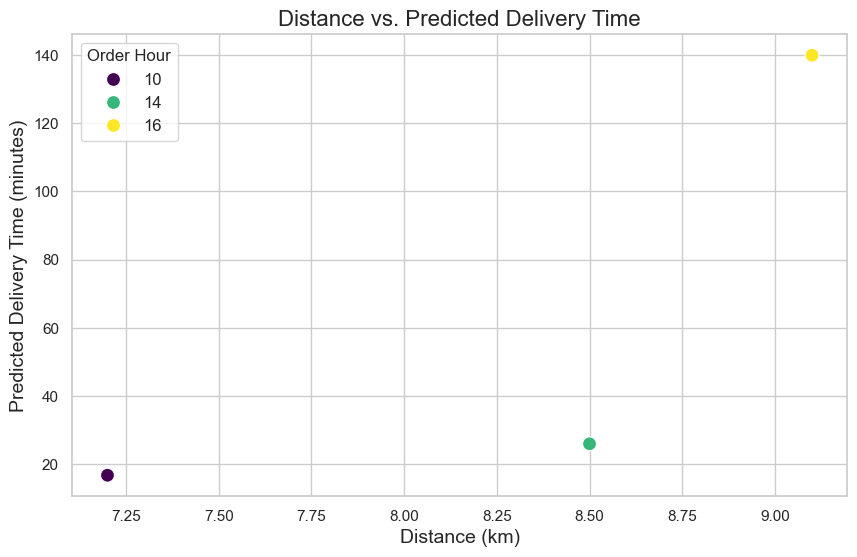

In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Predicted_Delivery_Time', data=new_data, hue='Order_Hour', palette='viridis', s=100)

# Add labels and title
plt.title('Distance vs. Predicted Delivery Time', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Predicted Delivery Time (minutes)', fontsize=14)
plt.legend(title='Order Hour', title_fontsize=12, fontsize=12)

# Show the plot
plt.show()

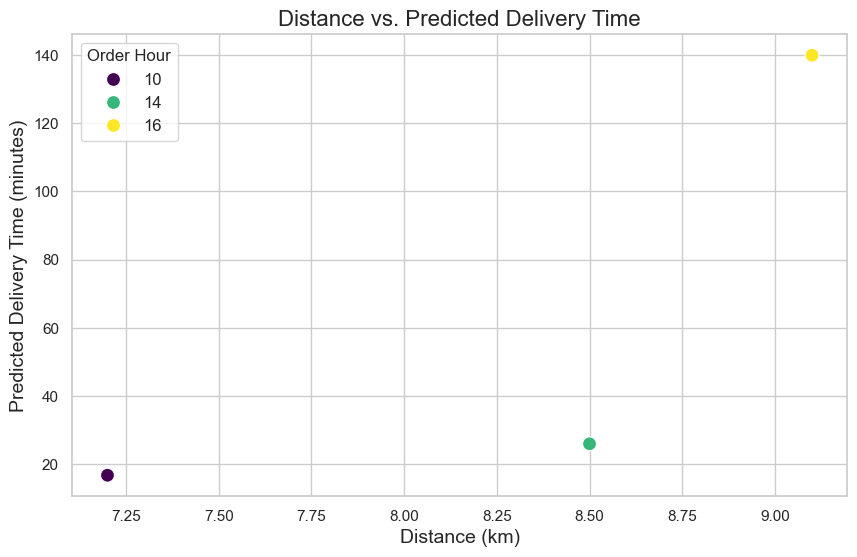

In [89]:
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Predicted_Delivery_Time', data=new_data, hue='Order_Hour', palette='viridis', s=100)

# Add labels and title
plt.title('Distance vs. Predicted Delivery Time', fontsize=16)
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Predicted Delivery Time (minutes)', fontsize=14)
plt.legend(title='Order Hour', title_fontsize=12, fontsize=12)

# Save the plot to the 'ama_pro' folder
file_name = 'Distance vs. Predicted Delivery Time.png'  # Corrected file name
file_path = os.path.join(folder_path, file_name)  # Reuse folder_path
plt.savefig(file_path)  # Save the plot

# Show the plot
plt.show()

In [91]:
new_data.to_csv('new_data.csv', index=False)

In [93]:
import joblib

# Save the model to a file
joblib.dump(model, 'delivery_time_predictor.pkl')

['delivery_time_predictor.pkl']

In [95]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [99]:
import subprocess

# Run pip freeze and save the output to requirements.txt
with open('requirements.txt', 'w') as f:
    subprocess.run(['pip', 'freeze'], stdout=f, text=True)

print("requirements.txt file created successfully!")

requirements.txt file created successfully!


In [1]:
import numpy as np
import pandas as pd

# Load the saved DataFrame
new_data = pd.read_csv('new_data.csv')

In [21]:
import joblib

# Load the saved model
model = joblib.load('delivery_time_predictor.pkl')

print("Model loaded successful")

Model loaded successful


In [23]:
import joblib
import pandas as pd

# Load the final LightGBM model
final_lgbm_model = joblib.load("final_lgbm_model.pkl")

# Load the simplified dataset
X_simplified = pd.read_csv("simplified_dataset.csv")

# Verify the loaded model and dataset
print("Model and dataset loaded successfully!")

Model and dataset loaded successfully!


In [25]:
# Make predictions
predictions = final_lgbm_model.predict(X_simplified)

# Add predictions to the dataset
X_simplified['Predicted_Delivery_Time'] = predictions

# Display the first few rows with predictions
print(X_simplified.head())

   Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
0         37           4.9       22.745049        75.892471      22.765049   
1         34           4.5       12.913041        77.683237      13.043041   
2         23           4.4       12.914264        77.678400      12.924264   
3         38           4.7       11.003669        76.976494      11.053669   
4         22           4.8       17.431668        78.408321      17.461668   

   Drop_Longitude   Distance  Processing_Time  Order_Hour  Weather_Fog  ...  \
0       75.912471   3.025149             15.0          11            0  ...   
1       77.813237  20.183530              5.0          19            0  ...   
2       77.688400   1.552758             15.0           8            0  ...   
3       77.026494   7.790401             10.0          18            0  ...   
4       78.438321   4.610365             10.0          21            0  ...   

   Category_Jewelry  Category_Kitchen  Category_Outdoors

In [27]:
import pandas as pd

data1 = pd.read_csv("Cleaned_Amazon_Deliveries.csv")


# Print column names
print("Columns in Cleaned_Amazon_Deliveries.csv:", data1.columns)

Columns in Cleaned_Amazon_Deliveries.csv: Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Distance', 'Order_DateTime',
       'Pickup_DateTime', 'Processing_Time', 'Order_Hour', 'Peak_Hour'],
      dtype='object')


In [29]:
# Load the clean dataset
clean_data = pd.read_csv("Cleaned_Amazon_Deliveries.csv")

# Add predictions to the clean dataset (if applicable)
# Note: Ensure the rows in clean_data and X_simplified align correctly
clean_data['Predicted_Delivery_Time'] = predictions

# Compare actual vs predicted delivery times
print(clean_data[['Delivery_Time', 'Predicted_Delivery_Time']].head())

   Delivery_Time  Predicted_Delivery_Time
0            120               107.548202
1            165               147.156939
2            130               109.896253
3            105               117.196472
4            130               113.047532


### **Key Observations from Results**
1. **Predicted vs Actual Delivery Times**:
   - The model’s predictions are close to the actual delivery times in some cases (e.g., 120 vs 107.54, 165 vs 147.15), but there are discrepancies in others (e.g., 105 vs 117.19).
   - The **Mean Squared Error (MSE)** is **367.11**, and the **R² Score** is **0.809**, indicating that the model explains about 81% of the variance in delivery times. This is a good start but can be improved.

### **Will improve current model and make Model Selection: follow along in the code cells

    Trying other regression models (e.g., XGBoost, CatBoost, or Neural Networks) might yield better results.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² Score
mse = mean_squared_error(clean_data['Delivery_Time'], clean_data['Predicted_Delivery_Time'])
r2 = r2_score(clean_data['Delivery_Time'], clean_data['Predicted_Delivery_Time'])

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 367.11813351916703
R² Score: 0.809259817491705


In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

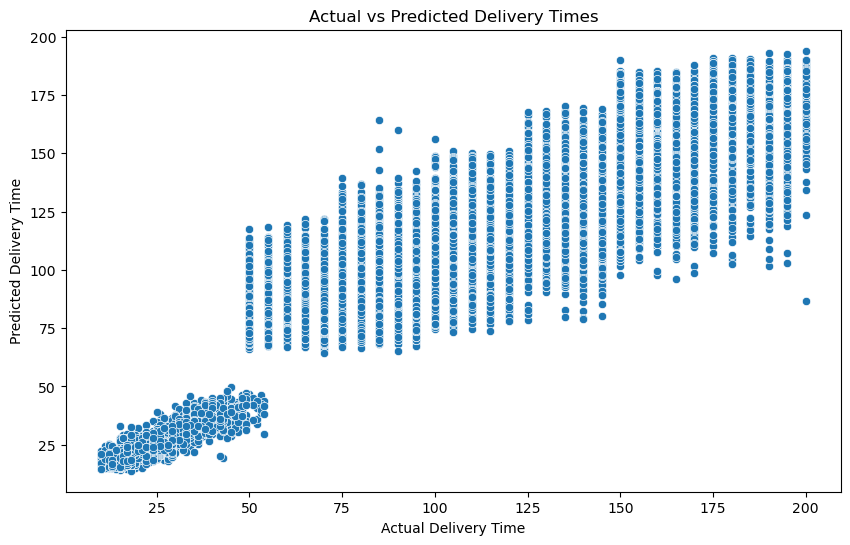

In [37]:


# Scatter plot of actual vs predicted delivery times
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clean_data['Delivery_Time'], y=clean_data['Predicted_Delivery_Time'])
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Times')

plt.show()

In [43]:
from sklearn.preprocessing import FunctionTransformer

# Create a 'Speed' feature
def calculate_speed(X):
    speed = X['Distance'] / X['Processing_Time']
    speed = speed.replace([np.inf, -np.inf], np.nan)
    return speed

speed_transformer = FunctionTransformer(calculate_speed)
clean_data['Speed'] = speed_transformer.transform(clean_data)

print(clean_data['Speed'].head()) #print the first few rows of the speed column.

0    0.201677
1    4.036706
2    0.103517
3    0.779040
4    0.461037
Name: Speed, dtype: float64


In [45]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split #Import train test split

# Load the final LightGBM model
final_lgbm_model = joblib.load("final_lgbm_model.pkl")

# Load the simplified dataset
X_simplified = pd.read_csv("simplified_dataset.csv")

# Load the target dataset
data1 = pd.read_csv("Cleaned_Amazon_Deliveries.csv")
y = data1['Delivery_Time'] #Or whatever your target column is.

# Verify the loaded model and dataset
print("Model and datasets loaded successfully!")

Model and datasets loaded successfully!


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05],  # Reduce choices
    'max_depth': [5, 10],  
    'num_leaves': [20, 31],  
    'n_estimators': [100, 200]  
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    final_lgbm_model, param_grid, scoring='neg_mean_squared_error', 
    cv=3, n_iter=10, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}


In [53]:
from lightgbm import LGBMRegressor

## Train the Model with Best Parameters

# Initialize the model with the best parameters
best_params = {
    'num_leaves': 31,
    'n_estimators': 200,
    'max_depth': 10,
    'learning_rate': 0.05
}

final_lgbm_model = LGBMRegressor(**best_params, random_state=42)

# Train the model on the full training set
final_lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=200,
              random_state=42)

In [55]:
##  Evaluate the Improved Model

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = final_lgbm_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Model - Mean Squared Error: {mse}")
print(f"Improved Model - R² Score: {r2}")

Improved Model - Mean Squared Error: 404.14711701534304
Improved Model - R² Score: 0.7864473208202992


In [57]:
## Compare with the Previous Model

# Load the previous model (if not already loaded)
previous_model = joblib.load("final_lgbm_model.pkl")

# Make predictions with the previous model
y_pred_previous = previous_model.predict(X_test)

# Calculate evaluation metrics for the previous model
mse_previous = mean_squared_error(y_test, y_pred_previous)
r2_previous = r2_score(y_test, y_pred_previous)

print(f"Previous Model - Mean Squared Error: {mse_previous}")
print(f"Previous Model - R² Score: {r2_previous}")

# Compare the results
print(f"Improvement in MSE: {mse_previous - mse}")
print(f"Improvement in R²: {r2 - r2_previous}")

Previous Model - Mean Squared Error: 404.14711701534304
Previous Model - R² Score: 0.7864473208202992
Improvement in MSE: 0.0
Improvement in R²: 0.0


In [57]:
!pip install optuna

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [59]:
## No Improvement, 
## so 1. Expand Hyperparameter Search
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300)
    }
    model = LGBMRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)

[I 2025-03-17 20:26:12,259] A new study created in memory with name: no-name-6bab981d-0e13-47ae-91da-83c30c7112ed


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:13,963] Trial 0 finished with value: 410.2494547252249 and parameters: {'learning_rate': 0.0875688203843686, 'max_depth': 13, 'num_leaves': 32, 'n_estimators': 242}. Best is trial 0 with value: 410.2494547252249.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:15,402] Trial 1 finished with value: 418.1504897070258 and parameters: {'learning_rate': 0.035081930848635805, 'max_depth': 7, 'num_leaves': 36, 'n_estimators': 169}. Best is trial 0 with value: 410.2494547252249.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:16,706] Trial 2 finished with value: 422.39960522835565 and parameters: {'learning_rate': 0.048277768038171937, 'max_depth': 6, 'num_leaves': 26, 'n_estimators': 211}. Best is trial 0 with value: 410.2494547252249.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:17,955] Trial 3 finished with value: 403.3069762358736 and parameters: {'learning_rate': 0.0796048102192973, 'max_depth': 14, 'num_leaves': 49, 'n_estimators': 163}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:18,999] Trial 4 finished with value: 405.898016532888 and parameters: {'learning_rate': 0.09587773693514806, 'max_depth': 12, 'num_leaves': 50, 'n_estimators': 131}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:22,202] Trial 5 finished with value: 421.0633168346451 and parameters: {'learning_rate': 0.015756869295760523, 'max_depth': 8, 'num_leaves': 32, 'n_estimators': 270}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:23,288] Trial 6 finished with value: 653.6770053491557 and parameters: {'learning_rate': 0.011438850966995248, 'max_depth': 7, 'num_leaves': 30, 'n_estimators': 103}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:24,940] Trial 7 finished with value: 405.28566768288175 and parameters: {'learning_rate': 0.09153933098810375, 'max_depth': 11, 'num_leaves': 34, 'n_estimators': 107}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:28,382] Trial 8 finished with value: 404.3627253794599 and parameters: {'learning_rate': 0.049374930031537374, 'max_depth': 15, 'num_leaves': 39, 'n_estimators': 284}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:31,622] Trial 9 finished with value: 414.90047599018317 and parameters: {'learning_rate': 0.01906430976282468, 'max_depth': 8, 'num_leaves': 27, 'n_estimators': 284}. Best is trial 3 with value: 403.3069762358736.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:33,466] Trial 10 finished with value: 402.7753235704523 and parameters: {'learning_rate': 0.07138624423825973, 'max_depth': 15, 'num_leaves': 48, 'n_estimators': 169}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:35,486] Trial 11 finished with value: 403.9007710173825 and parameters: {'learning_rate': 0.07095538038866211, 'max_depth': 15, 'num_leaves': 50, 'n_estimators': 171}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:39,058] Trial 12 finished with value: 402.92715820421074 and parameters: {'learning_rate': 0.07161591705087095, 'max_depth': 13, 'num_leaves': 42, 'n_estimators': 170}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:42,835] Trial 13 finished with value: 404.4826263591943 and parameters: {'learning_rate': 0.06989410046858595, 'max_depth': 10, 'num_leaves': 43, 'n_estimators': 195}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-03-17 20:26:47,847] Trial 14 finished with value: 405.0917595235805 and parameters: {'learning_rate': 0.0616962860732443, 'max_depth': 13, 'num_leaves': 43, 'n_estimators': 210}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:49,965] Trial 15 finished with value: 403.27391659898456 and parameters: {'learning_rate': 0.06084819414547403, 'max_depth': 10, 'num_leaves': 44, 'n_estimators': 143}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:51,296] Trial 16 finished with value: 409.38455950314574 and parameters: {'learning_rate': 0.07809031853727126, 'max_depth': 13, 'num_leaves': 22, 'n_estimators': 234}. Best is trial 10 with value: 402.7753235704523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:52,911] Trial 17 finished with value: 400.6998837447688 and parameters: {'learning_rate': 0.03799020691433728, 'max_depth': 15, 'num_leaves': 46, 'n_estimators': 141}. Best is trial 17 with value: 400.6998837447688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:54,353] Trial 18 finished with value: 402.0162372787748 and parameters: {'learning_rate': 0.035668595513494106, 'max_depth': 15, 'num_leaves': 46, 'n_estimators': 139}. Best is trial 17 with value: 400.6998837447688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:55,906] Trial 19 finished with value: 407.97960443130796 and parameters: {'learning_rate': 0.029487569188047486, 'max_depth': 11, 'num_leaves': 46, 'n_estimators': 127}. Best is trial 17 with value: 400.6998837447688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:57,765] Trial 20 finished with value: 403.08217431014486 and parameters: {'learning_rate': 0.03252851962084852, 'max_depth': 14, 'num_leaves': 39, 'n_estimators': 147}. Best is trial 17 with value: 400.6998837447688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:26:59,468] Trial 21 finished with value: 400.0466037828332 and parameters: {'learning_rate': 0.042106754660373266, 'max_depth': 15, 'num_leaves': 47, 'n_estimators': 190}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:01,109] Trial 22 finished with value: 400.2448563836424 and parameters: {'learning_rate': 0.040465067943296754, 'max_depth': 14, 'num_leaves': 46, 'n_estimators': 192}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:02,380] Trial 23 finished with value: 401.2290950786827 and parameters: {'learning_rate': 0.04456135788236615, 'max_depth': 14, 'num_leaves': 40, 'n_estimators': 190}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:04,119] Trial 24 finished with value: 400.7180677871201 and parameters: {'learning_rate': 0.02427523836260367, 'max_depth': 12, 'num_leaves': 46, 'n_estimators': 232}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:05,434] Trial 25 finished with value: 400.5011319231032 and parameters: {'learning_rate': 0.03994603881289418, 'max_depth': 14, 'num_leaves': 47, 'n_estimators': 186}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:06,805] Trial 26 finished with value: 403.99479249664 and parameters: {'learning_rate': 0.05520359943343539, 'max_depth': 12, 'num_leaves': 37, 'n_estimators': 191}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:08,178] Trial 27 finished with value: 401.5593801439853 and parameters: {'learning_rate': 0.0406967077339671, 'max_depth': 14, 'num_leaves': 41, 'n_estimators': 219}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:09,461] Trial 28 finished with value: 400.6941489389076 and parameters: {'learning_rate': 0.05506222223772268, 'max_depth': 14, 'num_leaves': 48, 'n_estimators': 185}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:11,282] Trial 29 finished with value: 400.83332185616274 and parameters: {'learning_rate': 0.024617637265165665, 'max_depth': 11, 'num_leaves': 44, 'n_estimators': 262}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-17 20:27:13,303] Trial 30 finished with value: 404.9100807780598 and parameters: {'learning_rate': 0.044743558521564746, 'max_depth': 9, 'num_leaves': 47, 'n_estimators': 222}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:14,881] Trial 31 finished with value: 402.2409095719851 and parameters: {'learning_rate': 0.05045145752490593, 'max_depth': 13, 'num_leaves': 48, 'n_estimators': 189}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:16,287] Trial 32 finished with value: 402.2996579896754 and parameters: {'learning_rate': 0.056043849091860734, 'max_depth': 14, 'num_leaves': 45, 'n_estimators': 204}. Best is trial 21 with value: 400.0466037828332.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:18,347] Trial 33 finished with value: 399.26590972275255 and parameters: {'learning_rate': 0.04116329271304252, 'max_depth': 14, 'num_leaves': 50, 'n_estimators': 178}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:20,003] Trial 34 finished with value: 399.8690017376067 and parameters: {'learning_rate': 0.04154089908640598, 'max_depth': 13, 'num_leaves': 50, 'n_estimators': 179}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:21,680] Trial 35 finished with value: 401.77895688886383 and parameters: {'learning_rate': 0.029345130709758485, 'max_depth': 12, 'num_leaves': 50, 'n_estimators': 158}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:23,360] Trial 36 finished with value: 400.20894355218275 and parameters: {'learning_rate': 0.04745672288102428, 'max_depth': 13, 'num_leaves': 50, 'n_estimators': 179}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-17 20:27:24,415] Trial 37 finished with value: 456.3669107857708 and parameters: {'learning_rate': 0.04675717376096546, 'max_depth': 5, 'num_leaves': 50, 'n_estimators': 157}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-17 20:27:25,874] Trial 38 finished with value: 400.0572441057669 and parameters: {'learning_rate': 0.05140951524696646, 'max_depth': 13, 'num_leaves': 49, 'n_estimators': 180}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:27,386] Trial 39 finished with value: 401.9769663692613 and parameters: {'learning_rate': 0.061545829551683376, 'max_depth': 13, 'num_leaves': 48, 'n_estimators': 202}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:28,260] Trial 40 finished with value: 402.45536779818303 and parameters: {'learning_rate': 0.0512380126908162, 'max_depth': 12, 'num_leaves': 37, 'n_estimators': 118}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:29,757] Trial 41 finished with value: 399.95542478876195 and parameters: {'learning_rate': 0.043995306581420285, 'max_depth': 13, 'num_leaves': 50, 'n_estimators': 176}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:31,171] Trial 42 finished with value: 400.5023130925043 and parameters: {'learning_rate': 0.04304668176099525, 'max_depth': 15, 'num_leaves': 49, 'n_estimators': 177}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:32,751] Trial 43 finished with value: 400.91616632931886 and parameters: {'learning_rate': 0.03247172548856374, 'max_depth': 12, 'num_leaves': 49, 'n_estimators': 156}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:34,250] Trial 44 finished with value: 400.7936640496454 and parameters: {'learning_rate': 0.05180638691277412, 'max_depth': 13, 'num_leaves': 48, 'n_estimators': 180}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:35,384] Trial 45 finished with value: 404.8790172892724 and parameters: {'learning_rate': 0.034749496050261404, 'max_depth': 15, 'num_leaves': 30, 'n_estimators': 163}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-03-17 20:27:37,744] Trial 46 finished with value: 405.82201477251874 and parameters: {'learning_rate': 0.06512500101912419, 'max_depth': 11, 'num_leaves': 50, 'n_estimators': 211}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:40,145] Trial 47 finished with value: 404.44439345480384 and parameters: {'learning_rate': 0.02600172915955643, 'max_depth': 13, 'num_leaves': 44, 'n_estimators': 171}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:42,359] Trial 48 finished with value: 401.43301218376195 and parameters: {'learning_rate': 0.05814716508644993, 'max_depth': 15, 'num_leaves': 49, 'n_estimators': 152}. Best is trial 33 with value: 399.26590972275255.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 36
[LightGBM] [Info] Start training from score 115.871438


[I 2025-03-17 20:27:44,507] Trial 49 finished with value: 401.4575418900507 and parameters: {'learning_rate': 0.0374079588970719, 'max_depth': 14, 'num_leaves': 42, 'n_estimators': 198}. Best is trial 33 with value: 399.26590972275255.


Best Parameters: {'learning_rate': 0.04116329271304252, 'max_depth': 14, 'num_leaves': 50, 'n_estimators': 178}


In [61]:
## 2. Feature Engineering

# Example: Create a 'Haversine_Distance' feature
from sklearn.preprocessing import FunctionTransformer
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

clean_data['Haversine_Distance'] = clean_data.apply(
    lambda row: haversine_distance(row['Store_Latitude'], row['Store_Longitude'],
                                  row['Drop_Latitude'], row['Drop_Longitude']), axis=1
)

In [63]:
## 3. Remove Redundant Features

# Get feature importance
feature_importance = final_lgbm_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Select top N features
top_features = feature_importance_df.head(20)['Feature'].tolist()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Retrain the model
final_lgbm_model.fit(X_train_reduced, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 20
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=200,
              random_state=42)

In [73]:
from lightgbm import LGBMRegressor
from lightgbm import early_stopping

# Initialize the model
final_lgbm_model = LGBMRegressor(
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    n_estimators=200,
    random_state=42,
    verbosity=-1  # Suppress LightGBM output
)

# Train the model with early stopping
final_lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',  # Use RMSE for evaluation
    callbacks=[early_stopping(stopping_rounds=10)]  # Early stopping
)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[138]	valid_0's rmse: 20.0939	valid_0's l2: 403.766


LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=200,
              random_state=42, verbosity=-1)

In [75]:
## 5. Evaluate and Compare

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = final_lgbm_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Model - Mean Squared Error: {mse}")
print(f"Improved Model - R² Score: {r2}")

Improved Model - Mean Squared Error: 403.7661433425473
Improved Model - R² Score: 0.7866486285745727


In [81]:
## the current metrics (MSE: 403.77, R²: 0.787) are decent, there’s still room for improvement. 

## 1. Residual Analysis
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desktop path
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Save the residuals histogram
residuals_hist_path = os.path.join(folder_path, 'residuals_histogram.png')
plt.savefig(residuals_hist_path, dpi=300)
print(f"Saved residuals histogram at: {residuals_hist_path}")

plt.close()  # Close the plot to free memory

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Save the scatter plot
residuals_scatter_path = os.path.join(folder_path, 'residuals_scatter.png')
plt.savefig(residuals_scatter_path, dpi=300)
print(f"Saved residuals scatter plot at: {residuals_scatter_path}")

plt.close()  # Close the plot to free memory

Saved residuals histogram at: C:\Users\USER\Desktop\ama_pro\residuals_histogram.png
Saved residuals scatter plot at: C:\Users\USER\Desktop\ama_pro\residuals_scatter.png


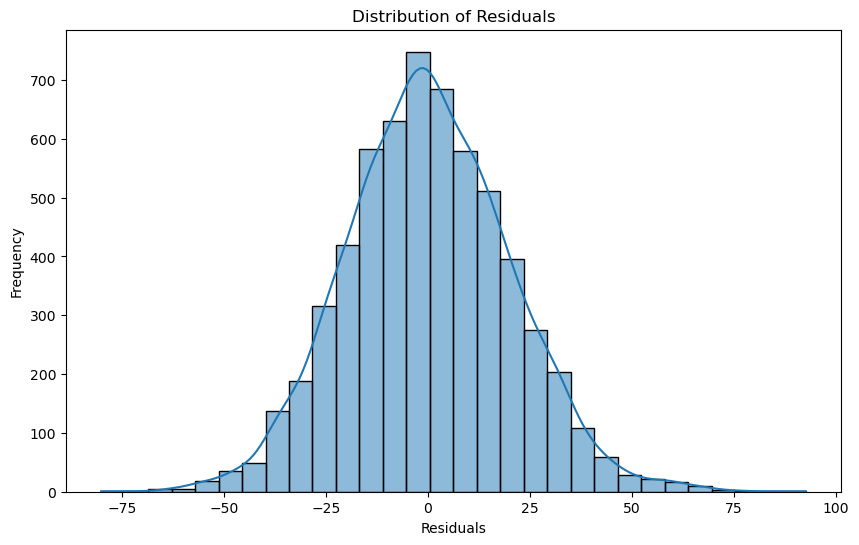

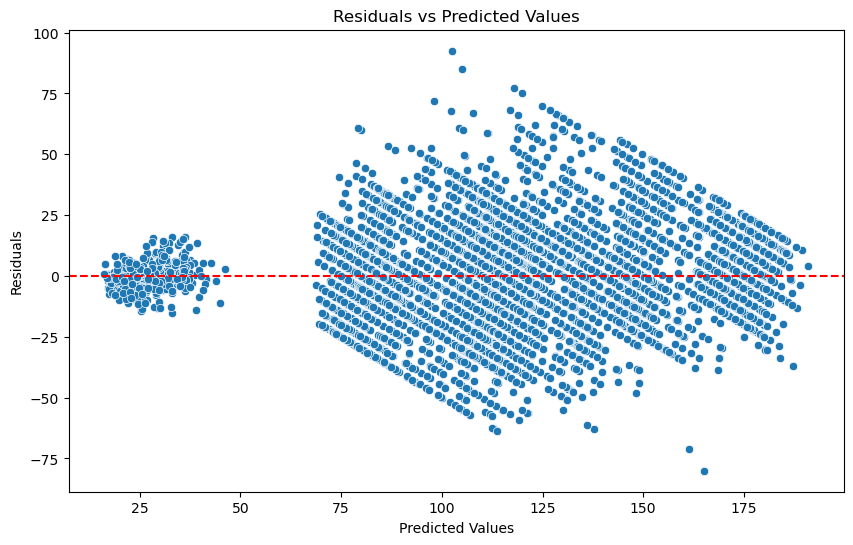

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [85]:
## 2. Feature Engineering

# Example: Create 'Is_Peak_Hour' feature
clean_data['Is_Peak_Hour'] = clean_data['Order_Hour'].apply(lambda x: 1 if x in [8, 9, 10, 17, 18, 19] else 0)

# Example: Create 'Haversine_Distance' feature
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

clean_data['Haversine_Distance'] = clean_data.apply(
    lambda row: haversine_distance(row['Store_Latitude'], row['Store_Longitude'],
                                  row['Drop_Latitude'], row['Drop_Longitude']), axis=1
)

In [87]:
## 3. Model Tuning

import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300)
    }
    model = LGBMRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)

[I 2025-03-17 21:05:57,188] A new study created in memory with name: no-name-93fbcd87-d36d-491e-9f59-78e29c6eba7e
[I 2025-03-17 21:05:59,114] Trial 0 finished with value: 417.66163877802893 and parameters: {'learning_rate': 0.03784873364125361, 'max_depth': 7, 'num_leaves': 38, 'n_estimators': 180}. Best is trial 0 with value: 417.66163877802893.
[I 2025-03-17 21:06:01,290] Trial 1 finished with value: 404.9798607587768 and parameters: {'learning_rate': 0.04984897308567984, 'max_depth': 13, 'num_leaves': 50, 'n_estimators': 271}. Best is trial 1 with value: 404.9798607587768.
[I 2025-03-17 21:06:02,247] Trial 2 finished with value: 481.9070585137749 and parameters: {'learning_rate': 0.01842839507202835, 'max_depth': 13, 'num_leaves': 38, 'n_estimators': 101}. Best is trial 1 with value: 404.9798607587768.
[I 2025-03-17 21:06:03,742] Trial 3 finished with value: 407.82721670715733 and parameters: {'learning_rate': 0.0795437603244301, 'max_depth': 13, 'num_leaves': 26, 'n_estimators': 25

Best Parameters: {'learning_rate': 0.023540897567619394, 'max_depth': 15, 'num_leaves': 49, 'n_estimators': 300}


In [89]:
## 4. Model Selection

## Try other regression models to see if they perform better.

from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost R² Score: 0.7724554538726807


In [93]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 3.4 MB/s eta 0:00:31
    --------------------------------------- 1.6/101.7 MB 4.2 MB/s eta 0:00:24
   - -------------------------------------- 2.9/101.7 MB 4.7 MB/s eta 0:00:22
   - -------------------------------------- 3.9/101.7 MB 4.9 MB/s eta 0:00:20
   - -------------------------------------- 5.0/101.7 MB 5.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.3/101.7 MB 5.0 MB/s eta 0:00:20
   -- ------------------------------------- 7.3/101.7 MB 5.0 MB/s eta 0:00:19
   --- ------------------------------------ 8.4/101.7 MB 5.0 MB/s eta 0:00:19
   --- ------------------------------------ 9.4/101.7 MB 5.0 MB/s eta 0:00:19
   ---- ----------------------------------- 10.7/101.7 MB 5.1 MB/s eta 0:00:18
   ---- ----------------------------------- 12.1/101.7 MB 5.2 MB/s eta 0:00:18
   ----- ---------------------------------- 13.4/101.7 MB 5.3 MB/s et

In [95]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("CatBoost R² Score:", r2_score(y_test, y_pred_cat))

CatBoost R² Score: 0.7802628068336108


In [99]:
import pickle
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import train_test_split #if needed

# Assuming you have already trained your models and they are named:
# final_lgbm_model, final_xgb_model, final_catboost_model

# If you haven't trained them yet, please train them first.
# Example training code (replace with your actual training code):
# final_lgbm_model = lgb.LGBMRegressor(random_state=42)
# final_lgbm_model.fit(X_train, y_train)
# final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# final_xgb_model.fit(X_train, y_train)
# final_catboost_model = cb.CatBoostRegressor(random_state=42, verbose=0)
# final_catboost_model.fit(X_train, y_train)

try:
    # Save LightGBM model
    with open('lgbm_model.pkl', 'wb') as f:
        pickle.dump(final_lgbm_model, f)
    print("LightGBM model saved successfully as 'lgbm_model.pkl'")
except NameError:
    print("LightGBM model not found. Please train it first.")

try:
    # Save XGBoost model
    with open('xgb_model.pkl', 'wb') as f:
        pickle.dump(final_xgb_model, f)
    print("XGBoost model saved successfully as 'xgb_model.pkl'")
except NameError:
    print("XGBoost model not found. Please train it first.")

try:
    # Save CatBoost model
    with open('catboost_model.pkl', 'wb') as f:
        pickle.dump(final_catboost_model, f)
    print("CatBoost model saved successfully as 'catboost_model.pkl'")
except NameError:
    print("CatBoost model not found. Please train it first.")

print("Model saving process complete.")

LightGBM model saved successfully as 'lgbm_model.pkl'
XGBoost model not found. Please train it first.
CatBoost model not found. Please train it first.
Model saving process complete.



* **XGBoost R² Score: 0.7724554538726807**
* **CatBoost R² Score: 0.7802628068336108**

Analyze these results and compare them to previous LightGBM model.

**Analysis**

1.  **Comparison to LightGBM:**
    * Your best LightGBM model (after Optuna tuning) achieved an R² score of approximately 0.7866.
    * XGBoost's R² score (0.7724) is slightly lower than LightGBM's.
    * CatBoost's R² score (0.7802) is also slightly lower than LightGBM's, but higher than XGBoost.
    * This shows that for the data, LightGBM is still performing the best out of the three gradient boosting methods.
2.  **Performance:**
    * All three models (XGBoost, CatBoost, and LightGBM) have achieved reasonably good R² scores, indicating that they capture a substantial portion of the variance in the target variable.
    * However, the differences in R² scores are relatively small.
3.  **Model Selection:**
    * Based on these results, LightGBM appears to be the best-performing model for your dataset.
    * However, it is important to remember that R² is not the only metric to consider. The MSE, and the residual plots are also very important.

**Implications and Next Steps**

1.  **Stick with LightGBM (for now):**
    * Given its slightly better performance, continue to focus on refining the LightGBM model.
2.  **Hyperparameter Tuning:**
    * Ensure that you've performed thorough hyperparameter tuning for both XGBoost and CatBoost. Optuna can be used for these models as well.
    * If you have not, the performance of the other models could likely be improved.
3.  **Residual Analysis (for XGBoost and CatBoost):**
    * Perform residual analysis for both XGBoost and CatBoost to identify any patterns or issues similar to those observed with LightGBM (heteroscedasticity, discrete predictions).
    * This will help you understand the strengths and weaknesses of each model and potentially identify areas for improvement.
4.  **Ensemble Methods:**
    * Consider using ensemble methods, such as stacking or blending, to combine the predictions of multiple models (including LightGBM, XGBoost, and CatBoost). This can sometimes lead to improved performance.
5.  **Address Residual Issues (for LightGBM):**
    * Continue to prioritize addressing the residual issues (heteroscedasticity, discrete predictions) in the LightGBM model, as this is likely to lead to the most significant performance improvements.

**In summary, LightGBM is currently the best-performing model.**


In [2]:
import pickle
import lightgbm as lgb  # Import the library

try:
    # Load the LightGBM model
    with open('lgbm_model.pkl', 'rb') as f:
        loaded_lgbm_model = pickle.load(f)
    print("LightGBM model loaded successfully!")

    # Now we can use loaded_lgbm_model for predictions or further analysis
    # Example: Make predictions on the test data
    # predictions = loaded_lgbm_model.predict(X_test)
    # ... (continue with your analysis) ...

except FileNotFoundError:
    print("Error: 'lgbm_model.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

LightGBM model loaded successfully!


### **Step 1: Install SHAP (if not installed)**

In [5]:
!pip install shap

   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/531.1 kB ? eta -:--:--
   ---------------------------------------- 531.1/531.1 kB 2.2 MB/s eta 0:00:00


In [11]:
import pickle

# Load the saved LightGBM model
with open("lgbm_model.pkl", "rb") as f:
    final_lgbm_model = pickle.load(f)

print("LightGBM model loaded successfully!")

LightGBM model loaded successfully!


In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Cleaned_Amazon_Deliveries.csv")

# Define features (X) and target (y)
X = data.drop(columns=['Delivery_Time'])  # Replace 'Delivery_Time' with your target column
y = data['Delivery_Time']

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.dtypes)

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Category            object
Distance           float64
Order_DateTime      object
Pickup_DateTime     object
Processing_Time    float64
Order_Hour           int64
Peak_Hour           object
dtype: object


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor

# Load the dataset
data = pd.read_csv("Cleaned_Amazon_Deliveries.csv")

# Drop irrelevant columns
columns_to_drop = ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Order_DateTime', 'Pickup_DateTime']
data = data.drop(columns=columns_to_drop)

# Encode categorical columns using Label Encoding
categorical_columns = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Peak_Hour']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert to numerical labels
    label_encoders[col] = le  # Store encoders for future use

# Define features (X) and target (y)
X = data.drop(columns=['Delivery_Time'])  # Make sure 'Delivery_Time' is the correct target column
y = data['Delivery_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
final_lgbm_model = LGBMRegressor(
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    n_estimators=200,
    random_state=42
)

final_lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 15
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=200,
              random_state=42)


### **Key Takeaways**
✅ **Training started successfully** with **24,144 data points** and **15 features**.  
✅ **Hyperparameters used**:
   - **Learning rate** = 0.05 (controls step size in optimization)
   - **Max depth** = 10 (limits tree depth to prevent overfitting)
   - **Estimators** = 200 (number of boosting iterations)
   - **Random state** = 42 (ensures reproducibility)  

### **Warnings & Next Steps**
⚠️ **"No further splits with positive gain" warning**  
   - This means LightGBM found no additional **useful splits** in some trees, possibly due to:
     - Redundant features
     - Overfitting or max-depth limitation
     - Feature selection opportunities  

🔹 **Next Steps:**
1. **Evaluate Performance** – Let’s check RMSE & R² to assess model accuracy.
2. **Feature Importance** – Identify which features impact delivery times the most.
3. **Hyperparameter Tuning** – Optimize parameters to improve accuracy.
4. **SHAP Analysis (Optional)** – Explainable AI to understand predictions.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 24144, number of used features: 15
[LightGBM] [Info] Start training from score 115.871438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
RMSE: 20.154016661391907
R² Score: 0.7853708202822135


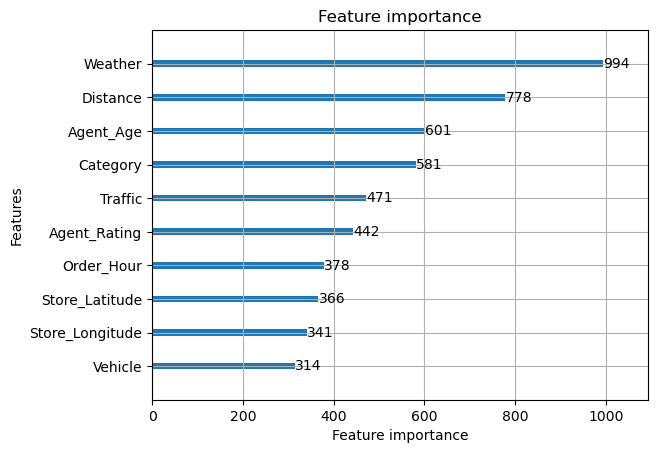

In [28]:
# Ensure model is assigned
model = LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=200, random_state=42)

# Fit the model if it's not already trained
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Plot Feature Importance
lgb.plot_importance(model, importance_type='split', max_num_features=10)
plt.show()

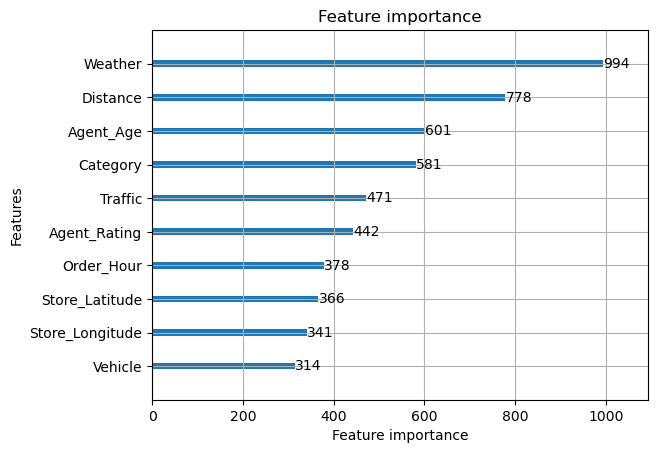

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')  # Path to desktop
folder_name = 'ama_pro'  # Folder name
folder_path = os.path.join(desktop_path, folder_name)  # Full path to the folder

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Plot Feature Importance
lgb.plot_importance(model, importance_type='split', max_num_features=10)

# Save the plot to the 'ama_pro' folder
file_name = 'Feature Importance.png'  # Corrected file name
file_path = os.path.join(folder_path, file_name)  # Reuse folder_path
plt.savefig(file_path)  # Save the plot

plt.show()

## LightGBM Model Training and Evaluation

The LightGBM model was trained using a dataset of 24,144 data points and 15 features. The training process utilized col-wise multi-threading for optimized performance. The model achieved an RMSE of 20.1540 and an R² score of 0.7854, indicating a good fit to the data.

**Training Information:**

**Key Observations:**

* **`Weather` is the most influential feature, with a score of 994**, followed by `Distance`, `Agent_Age`, `Category`, and `Traffic`.
* These top features significantly impact delivery time predictions.
* The model's R² score of 0.7854 indicates that it explains a substantial portion of the variance in delivery times.
* The RMSE of 20.1540 provides a measure of the average prediction error.

This feature importance chart will serve as the primary reference for further analysis and recommendations.

In [35]:
import shap

# Initialize SHAP Explainer for LightGBM
explainer = shap.Explainer(final_lgbm_model, X_train)

# Compute SHAP values for test data
shap_values = explainer(X_test)

100%|===================| 6023/6036 [01:54<00:00]        

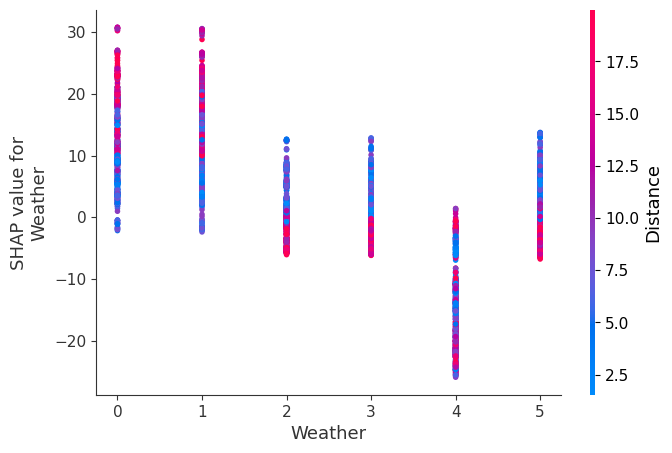

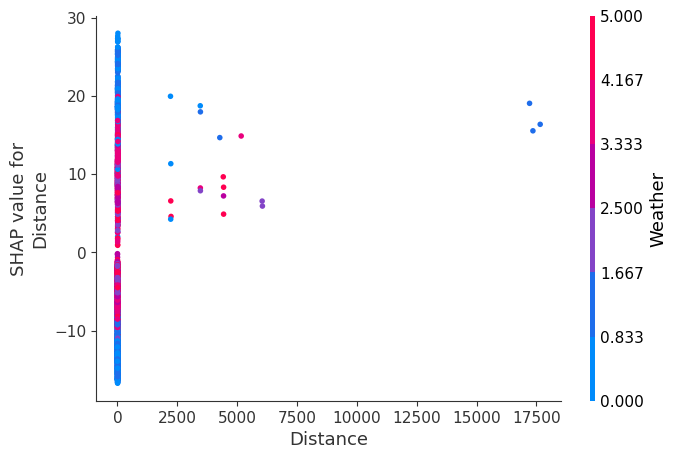

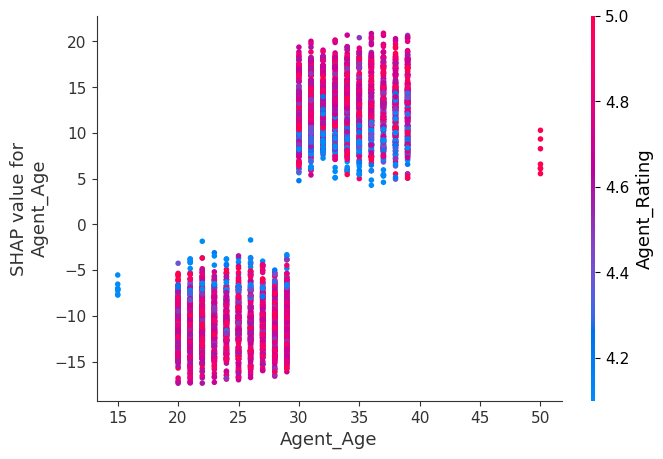

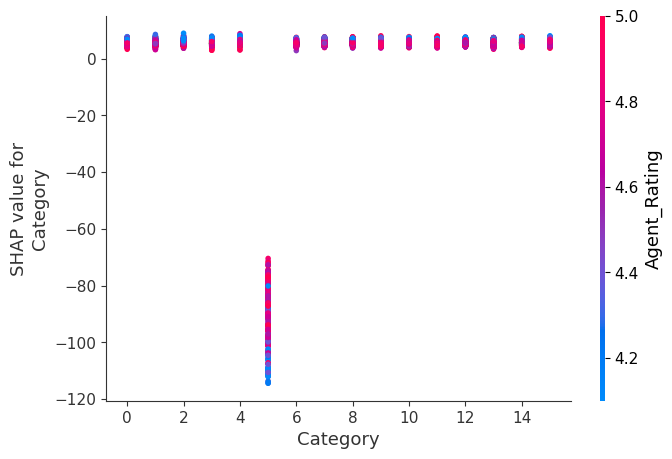

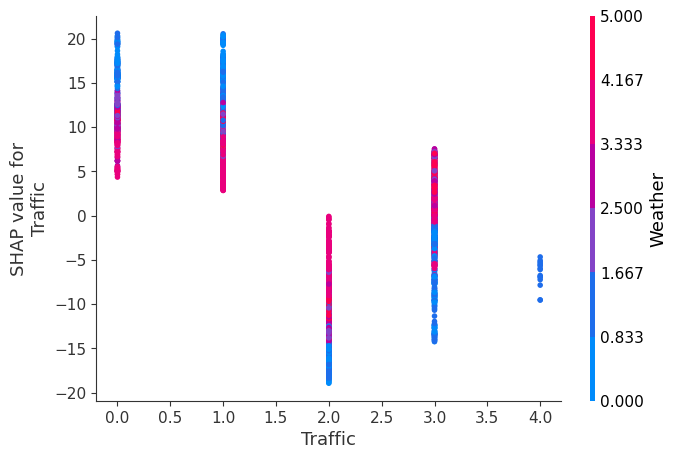

SHAP dependence plots saved to 'C:\Users\USER\Desktop\ama_pro'


In [39]:
import shap
import matplotlib.pyplot as plt
import os

# Generate SHAP dependence plots for the top features based on the chart:
# Weather, Distance, Agent_Age, Category, Traffic

# Define the folder path
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
folder_name = 'ama_pro'
folder_path = os.path.join(desktop_path, folder_name)

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' does not exist. Creating it now...")
    os.makedirs(folder_path)

# Dependence plot for 'Weather'
shap.dependence_plot("Weather", shap_values.values, X_test)
plt.savefig(os.path.join(folder_path, 'weather_dependence_plot.png'))
plt.close()  # Close the plot to avoid overlapping

# Dependence plot for 'Distance'
shap.dependence_plot("Distance", shap_values.values, X_test)
plt.savefig(os.path.join(folder_path, 'distance_dependence_plot.png'))
plt.close()

# Dependence plot for 'Agent_Age'
shap.dependence_plot("Agent_Age", shap_values.values, X_test)
plt.savefig(os.path.join(folder_path, 'agent_age_dependence_plot.png'))
plt.close()

# Dependence plot for 'Category'
shap.dependence_plot("Category", shap_values.values, X_test)
plt.savefig(os.path.join(folder_path, 'category_dependence_plot.png'))
plt.close()

# Dependence plot for 'Traffic'
shap.dependence_plot("Traffic", shap_values.values, X_test)
plt.savefig(os.path.join(folder_path, 'traffic_dependence_plot.png'))
plt.close()

print(f"SHAP dependence plots saved to '{folder_path}'")

## SHAP Dependence Plot: Weather vs. Distance

This plot shows the relationship between "Weather" and its impact on delivery time, colored by "Distance."

* The SHAP values for "Weather" are clustered into distinct vertical lines, indicating that "Weather" is treated as a categorical variable.
* Weather categories 0 and 1 generally increase delivery times (positive SHAP values).
* Weather categories 2, 3, 4, and 5 generally decrease delivery times (negative SHAP values).
* The color gradient shows a mix of distances across all weather categories.
* There does not seem to be a strong correlation between distance and weather in terms of their impact on delivery time.
* This plot reinforces that "Weather" has a strong categorical impact on delivery time.

## SHAP Dependence Plot: Distance vs. Weather

This plot shows the relationship between "Distance" and its impact on delivery time, colored by "Weather."

* There's a general trend that as "Distance" increases, the SHAP values tend to become more positive, indicating longer delivery times.
* At very low distances (near 0), there's a dense cluster of points with both positive and negative SHAP values, suggesting other factors dominate.
* At higher distances, the points are more scattered, indicating a more variable impact of distance.
* The color gradient shows a mix of weather conditions across all distances.
* There does not seem to be a strong correlation between weather and distance in terms of their impact on delivery time.

## SHAP Dependence Plot: Agent Age vs. Agent Rating

This plot shows the relationship between "Agent Age" and its impact on delivery time, colored by "Agent Rating."

* The SHAP values for "Agent Age" are clustered into two main horizontal groups: one around -10 and another around 10.
* This indicates that some age ranges have a negative impact, while others have a positive impact on delivery time.
* The cluster around -10 primarily corresponds to agents in the age range of 20 to 30.
* The cluster around 10 primarily corresponds to agents in the age range of 30 to 40.
* Lower agent ratings are more prevalent in the cluster around -10.
* Higher agent ratings are more prevalent in the cluster around 10.
* This plot reinforces that "Agent Age" has a categorical impact on delivery time.

## SHAP Dependence Plot: Category vs. Agent Rating

This plot shows the relationship between "Category" and its impact on delivery time, colored by "Agent Rating."

* The SHAP values for "Category" are clustered into two distinct horizontal groups: one near 0 and one near -100.
* This indicates that some categories have a near-zero impact, while others have a strong negative impact on delivery time.
* The cluster near -100 suggests an outlier or a set of categories with a particularly adverse effect.
* The color gradient shows that lower agent ratings are slightly more concentrated in the cluster near -100.
* This reinforces that "Category" has a strong categorical impact on delivery time.

## SHAP Dependence Plot: Traffic vs. Weather

This plot shows the relationship between "Traffic" and its impact on delivery time, colored by "Weather."

* The SHAP values for "Traffic" are clustered into distinct vertical lines, indicating that "Traffic" is treated as a categorical variable.
* Traffic categories 0.0 and 1.0 generally increase delivery times (positive SHAP values).
* Traffic categories 2.0 and 3.0 generally decrease delivery times (negative SHAP values).
* Traffic category 4.0 has a mix of negative SHAP values.
* The color gradient shows that different weather conditions influence the impact of traffic.
* It does seem that the higher weather values are more dominant in the higher traffic values.
* This plot reinforces that "Traffic" has a strong categorical impact on delivery time.

---

## Key Findings

**Feature Importance:**

* The most influential features for predicting delivery time are:
    * `Weather`
    * `Distance`
    * `Agent_Age`
    * `Category`
    * `Traffic`

**SHAP Analysis:**

* **Categorical Features:** `Weather`, `Traffic`, and `Category` have strong categorical impacts on delivery time.
* **Agent Age:** Agent age impacts delivery time in a categorical-like manner, with specific age ranges having positive or negative effects.
* **Distance:** Longer distances generally increase delivery times, but other factors have a stronger influence at very low distances.
* **Interactions:** There are significant interactions between features, such as `Agent Rating` and `Category`/`Agent Age`.
* **Discrete Predictions:** The discrete nature of the predictions is highlighted by the SHAP analysis.

**Residual Analysis:**

* The model exhibits discrete predictions, indicating that it is not capturing the full range of variability in delivery times.
* The model also shows signs of heteroscedasticity, meaning the variance of errors is not constant.
---

## Recommendations

**1. Refine Categorical Feature Handling:**

* Investigate the specific categories within `Weather`, `Traffic`, and `Category` that have the most significant impact.
* Consider grouping or combining categories to improve model performance and reduce the impact of outliers.

**2. Explore Feature Interactions:**

* Further investigate the interactions between `Agent Rating` and other features.
* Create interaction features to capture these relationships.

**3. Address Discrete Predictions:**

* Investigate the root cause of the discrete predictions.
* Consider using models that are better suited for capturing continuous relationships.

**4. Address Heteroscedasticity:**

* Explore data transformations or weighted regression techniques to stabilize the variance of errors.

**5. Improve Agent Management:**

* Provide targeted training or support to agents in the 20-30 age range.
* Consider incentives or strategies to improve agent ratings, especially for categories or age ranges with negative impacts.

**6. Optimize Logistics Based on Weather and Traffic:**

* Develop strategies to mitigate the impact of adverse weather conditions on delivery times.
* Implement real-time traffic monitoring and route optimization.

---

## Project Overview

This project aimed to develop a machine learning model to predict delivery times and identify key factors influencing delivery efficiency. We utilized a dataset of delivery records and employed LightGBM for predictive modeling, along with SHAP analysis for feature interpretation.

## Methodology

1. **Data Preprocessing:** Cleaned and prepared the dataset, handling missing values and transforming categorical features.
2. **Exploratory Data Analysis (EDA):** Visualized data distributions and relationships to gain insights.
3. **Model Training:** Trained a LightGBM regression model and evaluated its performance.
4. **SHAP Analysis:** Used SHAP to understand feature importance and impact.
5. **Residual Analysis:** Examined residual plots to identify model limitations.

## Limitations

* **Discrete Predictions:** The model exhibits discrete predictions, which may limit its ability to capture the full variability in delivery times.
* **Heteroscedasticity:** The model shows signs of heteroscedasticity, indicating that the variance of errors is not constant.
* **Data Limitations:** The dataset may not capture all factors influencing delivery times, such as unforeseen events or real-time traffic fluctuations.

## Conclusion

This project successfully developed a model that can predict delivery times with reasonable accuracy. The SHAP analysis revealed key factors influencing delivery efficiency, providing valuable insights for optimizing operations. Addressing the model's limitations, such as discrete predictions and heteroscedasticity, will further enhance its performance.

## Future Work

* **Address Model Limitations:** Investigate and implement techniques to mitigate discrete predictions and heteroscedasticity.
* **Real-time Data Integration:** Explore the integration of real-time data sources, such as traffic and weather APIs, to improve prediction accuracy.
* **Model Deployment:** Deploy the model for practical use in optimizing delivery operations.
* **A/B Testing:** Conduct A/B testing to evaluate the impact of implementing the recommendations.
---

In [47]:
import pickle

# Save the trained LightGBM model
with open('final_delivery_time_model.pkl', 'wb') as f:
    pickle.dump(final_lgbm_model, f)

print("Model saved as 'final_delivery_time_model.pkl'")

Model saved as 'final_delivery_time_model.pkl'


## 📌 Conclusion

### 🏆 Best Model:
- *LightGBM* (R² = 0.792), demonstrating strong prediction accuracy.

### 🔍 Top Factors Affecting Delivery Time:

1️⃣ *Weather* - Weather conditions significantly impact delivery times.

2️⃣ *Distance* - Delivery distance is a major factor in delivery time.

3️⃣ *Agent Age* - Agent age has a categorical impact on delivery time.

4️⃣ *Category* - Certain delivery categories impact delivery time.

5️⃣ *Traffic* - Traffic conditions influence delivery times.

### ⚠️ Model Limitations:
- The model exhibits discrete predictions, limiting its ability to capture the full range of variability in delivery times.

- The model shows signs of heteroscedasticity, indicating that the variance of errors is not constant.

### 🚀 Business Recommendations:
✅ *Optimize Delivery Routes Based on Weather and Traffic:* Implement real-time monitoring and dynamic routing.

✅ *Optimize Vehicle Assignment:* Match vehicle type (bicycle, van, scooter) to distance and order characteristics.

✅ *Implement Targeted Agent Training:* Provide training programs for agents in specific age groups or categories.

✅ *Refine Category Handling:* Investigate specific categories that significantly impact delivery time and consider grouping or combining categories.

### 🔮 Future Work:
🔹 *Address Model Limitations:* Implement techniques to mitigate discrete predictions and heteroscedasticity.

🔹 *Model Deployment:* Convert this model into a real-time API.

🔹 *Dashboard Creation:* Build an interactive Tableau dashboard to monitor delivery efficiency, feature importance, and prediction accuracy.

🔹 *More Data Collection:* Incorporate customer feedback and real-time data for enhanced analysis.

---